In [1]:
import numpy as np
import pandas as pd

In [2]:
full_data = pd.read_csv('data/cleaned_data.csv', sep='=')

In [3]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   district      364 non-null    object 
 1   total_area    364 non-null    float64
 2   living_area   364 non-null    float64
 3   kitchen_area  364 non-null    float64
 4   description   357 non-null    object 
 5   price         364 non-null    float64
 6   rooms         364 non-null    int64  
 7   level         364 non-null    int64  
 8   first         364 non-null    int64  
 9   last          364 non-null    int64  
 10  max_level     364 non-null    int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 31.4+ KB


In [4]:
full_data.head()

district  total_area  living_area  kitchen_area  \
0      Правобережный        42.1         27.0           6.0   
1  Орджоникидзевский        49.2         25.0          13.0   
2      Правобережный        22.0         12.0           6.0   
3          Ленинский        30.0         18.2           5.6   
4      Правобережный        53.0         35.0           9.0   

                                         description   price  rooms  level  \
0  Район с развитой инфраструктурой, рядом "Парк ...  3050.0      2      4   
1  Продам квартиру в отличном состоянии, лоджия з...  3800.0      1     10   
2  Продаётся однокомнатная квартира "малосемейка"...  1800.0      1      4   
3  Продам 1 комнатную квартиру в Ленинском районе...  2200.0      1      5   
4  id:30409. Продается двухкомнатная  квартира  у...  4100.0      2      1   

   first  last  max_level  
0      0     0          5  
1      0     1         10  
2      0     0          9  
3      0     1          5  
4      1     0          9

# Подготовка данных

In [5]:
full_data.groupby('district').nunique()

total_area  living_area  kitchen_area  \
district                                                                 
Ленинский                                77           46            22   
Ленинский (левый берег)                   4            4             3   
Орджоникидзевский                        94           60            26   
Орджоникидзевский (левый берег)          18           13             9   
Правобережный                            59           38            15   

                                 description  price  rooms  level  first  \
district                                                                   
Ленинский                                101     76      4      9      2   
Ленинский (левый берег)                    4      4      4      4      2   
Орджоникидзевский                        158    105      4     12      2   
Орджоникидзевский (левый берег)           21     19      5      4      2   
Правобережный                             71     58      4     11      2   

                                 last  max_level  
district                                          
Ленинский                           2          9  
Ленинский (левый берег)             2          3  
Орджоникидзевский                   2         12  
Орджоникидзевский (левый берег)     2          5  
Правобережный                       2         11

Закодируем информацию о районах и вынесем ее в отдельную переменную.

In [6]:
full_data.loc[full_data[full_data['district'] == 'Правобережный'].index, 'district'] = 0
full_data.loc[full_data[full_data['district'] == 'Орджоникидзевский'].index, 'district'] = 1
full_data.loc[full_data[full_data['district'] == 'Орджоникидзевский (левый берег)'].index,
              'district'] = 2
full_data.loc[full_data[full_data['district'] == 'Ленинский'].index, 'district'] = 3
full_data.loc[full_data[full_data['district'] == 'Ленинский (левый берег)'].index,
              'district'] = 4
true_districts = full_data['district']

In [7]:
true_districts

0      0
1      1
2      0
3      3
4      0
      ..
359    0
360    0
361    3
362    2
363    1
Name: district, Length: 364, dtype: object

Отбросим информацию о районе и описание.

In [8]:
data = full_data.drop(columns=['description', 'district'])

In [9]:
data

total_area  living_area  kitchen_area   price  rooms  level  first  last  \
0          42.1         27.0           6.0  3050.0      2      4      0     0   
1          49.2         25.0          13.0  3800.0      1     10      0     1   
2          22.0         12.0           6.0  1800.0      1      4      0     0   
3          30.0         18.2           5.6  2200.0      1      5      0     1   
4          53.0         35.0           9.0  4100.0      2      1      1     0   
..          ...          ...           ...     ...    ...    ...    ...   ...   
359        26.0         14.0           7.0  3145.0      1      5      0     0   
360        67.2         45.0          12.0  5000.0      3      1      1     0   
361        74.0         56.0           9.0  5500.0      3      5      0     1   
362        41.0         22.2           7.2   930.0      2      1      1     0   
363        65.0         43.0           9.0  4200.0      3      7      0     0   

     max_level  
0            5  
1           10  
2            9  
3            5  
4            9  
..         ...  
359         16  
360          2  
361          5  
362          5  
363          9  

[364 rows x 9 columns]

Перед снижением размерности используем StandardScaler.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data), columns = data.columns)

# Подготовка отображения кластеров

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_clusters(reduced_data, labels, title):    
    unique_labels = list(np.unique(labels))
    fig, ax = plt.subplots(figsize=(7,7)) #, subplot_kw={"projection": "3d"})
    plot = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='turbo')
    ax.legend(handles=plot.legend_elements()[0], labels=unique_labels)
    
    plt.title(title)
    plt.show()

Для отображения кластеров на плоскости снизим размерность исходных данных до 2х измерений. Проверим разные методы уменьшения размерности.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

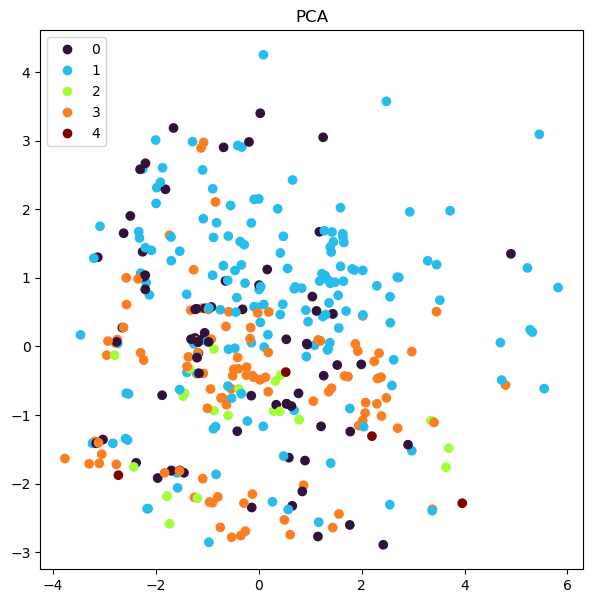

In [13]:
plot_clusters(pca_data, true_districts, 'PCA')

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

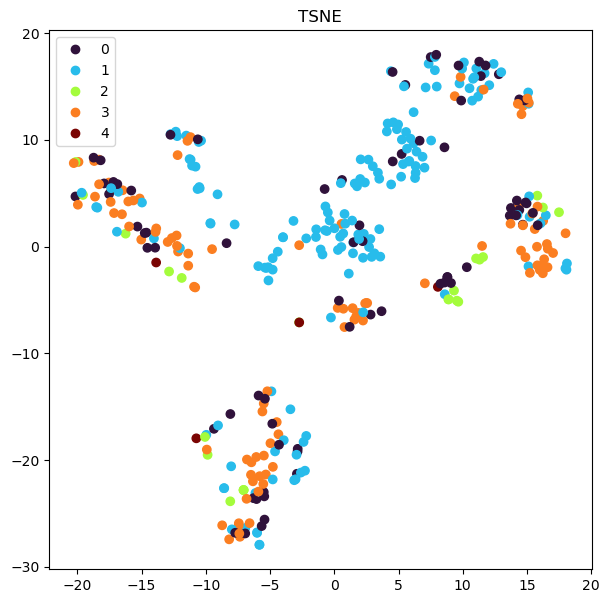

In [15]:
plot_clusters(tsne_data, true_districts, 'TSNE')

In [16]:
import umap
umap = umap.UMAP(n_components=2, random_state=42, n_neighbors=10, min_dist=0.5,
                 metric='minkowski')
umap_data = umap.fit_transform(scaled_data)

/home/natasha/anaconda3/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/natasha/anaconda3/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/natasha/anaconda3/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecatio

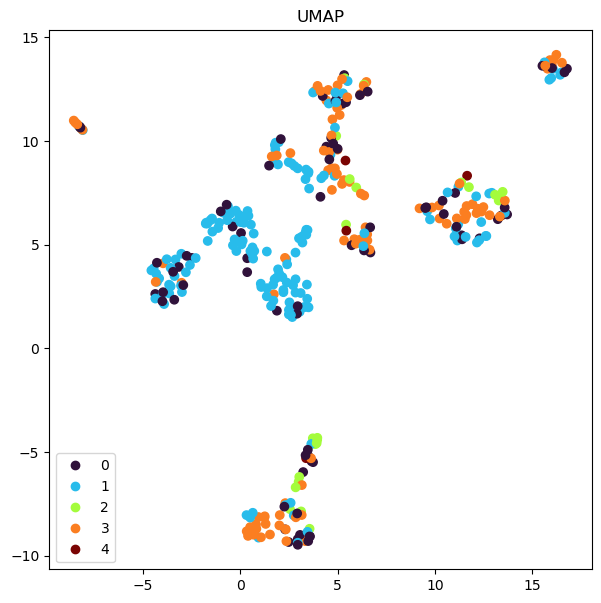

In [17]:
plot_clusters(umap_data, true_districts, 'UMAP')

Разные методы снижения размерности могут отражать различные закономерности в данных, поэтому будем сравнивать их на 1 рисунке.

In [18]:
import matplotlib.pyplot as plt

def compare_clusters(title, labels_1=None, 
                     labels_2=None, labels_3=None,
                     reduced_data_1=pca_data, reduced_data_2=tsne_data, reduced_data_3=umap_data,
                     titles_for_data=None):   
    if labels_1 is None:
        labels_1 = [0 for _ in range(len(reduced_data_1))]
    if labels_2 is None:
        labels_2 = labels_1
    if labels_3 is None:
        labels_3 = labels_1
    if titles_for_data is None:
        titles_for_data = ['PCA', 'tSNE', 'UMAP']
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17,10))
    plot_1 = axes[0].scatter(reduced_data_1[:, 0], reduced_data_1[:, 1], c=labels_1, cmap='turbo')
    plot_2 = axes[1].scatter(reduced_data_2[:, 0], reduced_data_2[:, 1], c=labels_2, cmap='turbo') #'brg')
    plot_3 =axes[2].scatter(reduced_data_3[:, 0], reduced_data_3[:, 1], c=labels_3, cmap='turbo')
    for index in range(3):
        axes[index].set_title(titles_for_data[index])
    axes[0].legend(handles=plot_1.legend_elements()[0], labels=list(np.unique(labels_1)))
    axes[1].legend(handles=plot_2.legend_elements()[0], labels=list(np.unique(labels_2)))
    axes[2].legend(handles=plot_3.legend_elements()[0], labels=list(np.unique(labels_3)))
    
    fig.suptitle(title)
    plt.show()

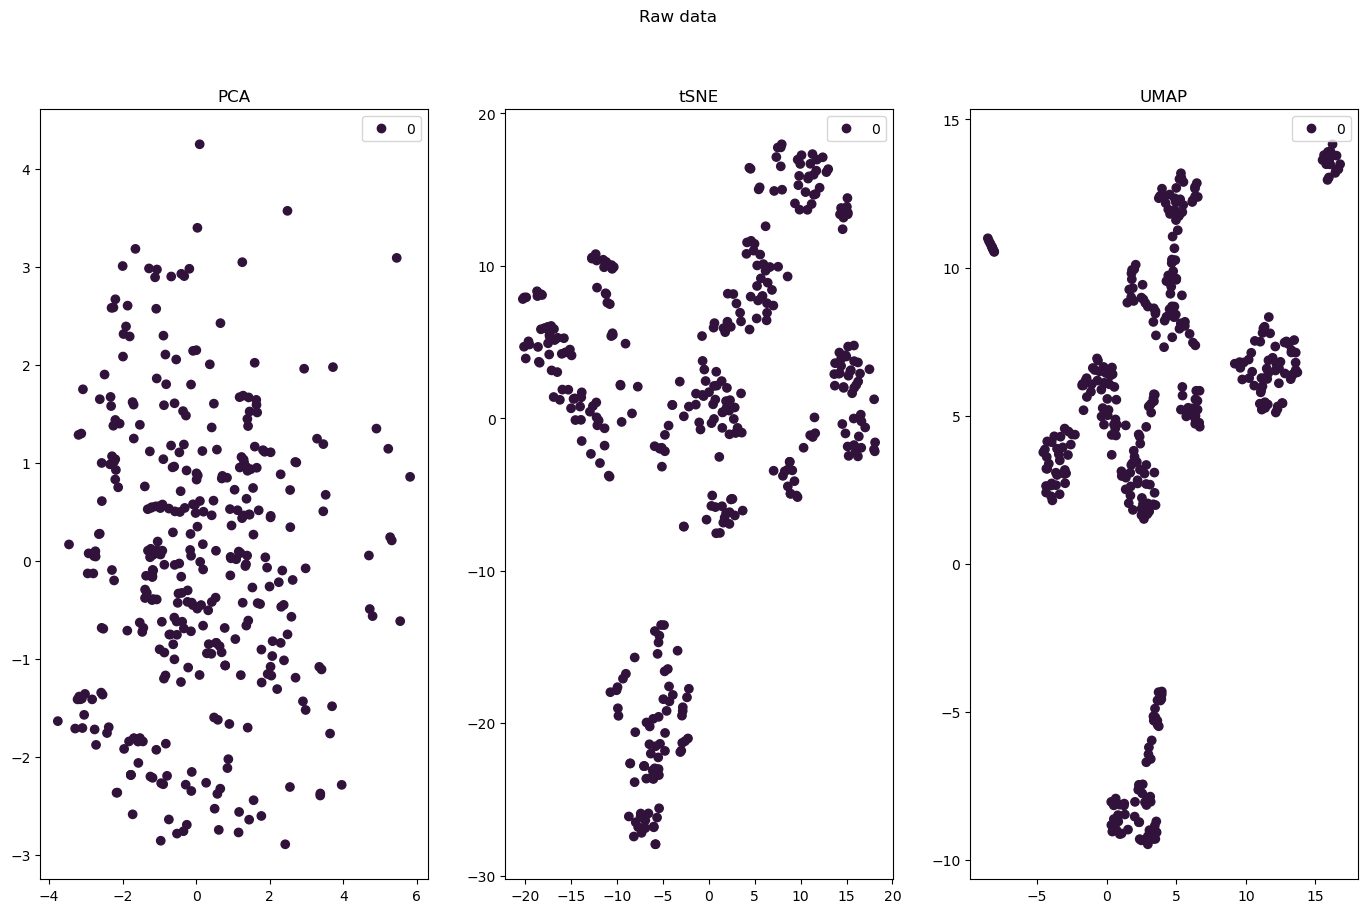

In [19]:
compare_clusters('Raw data')

# Истинное распределение данных

Посмотрим как истинные районы данных ложатся на "плоские" данные.

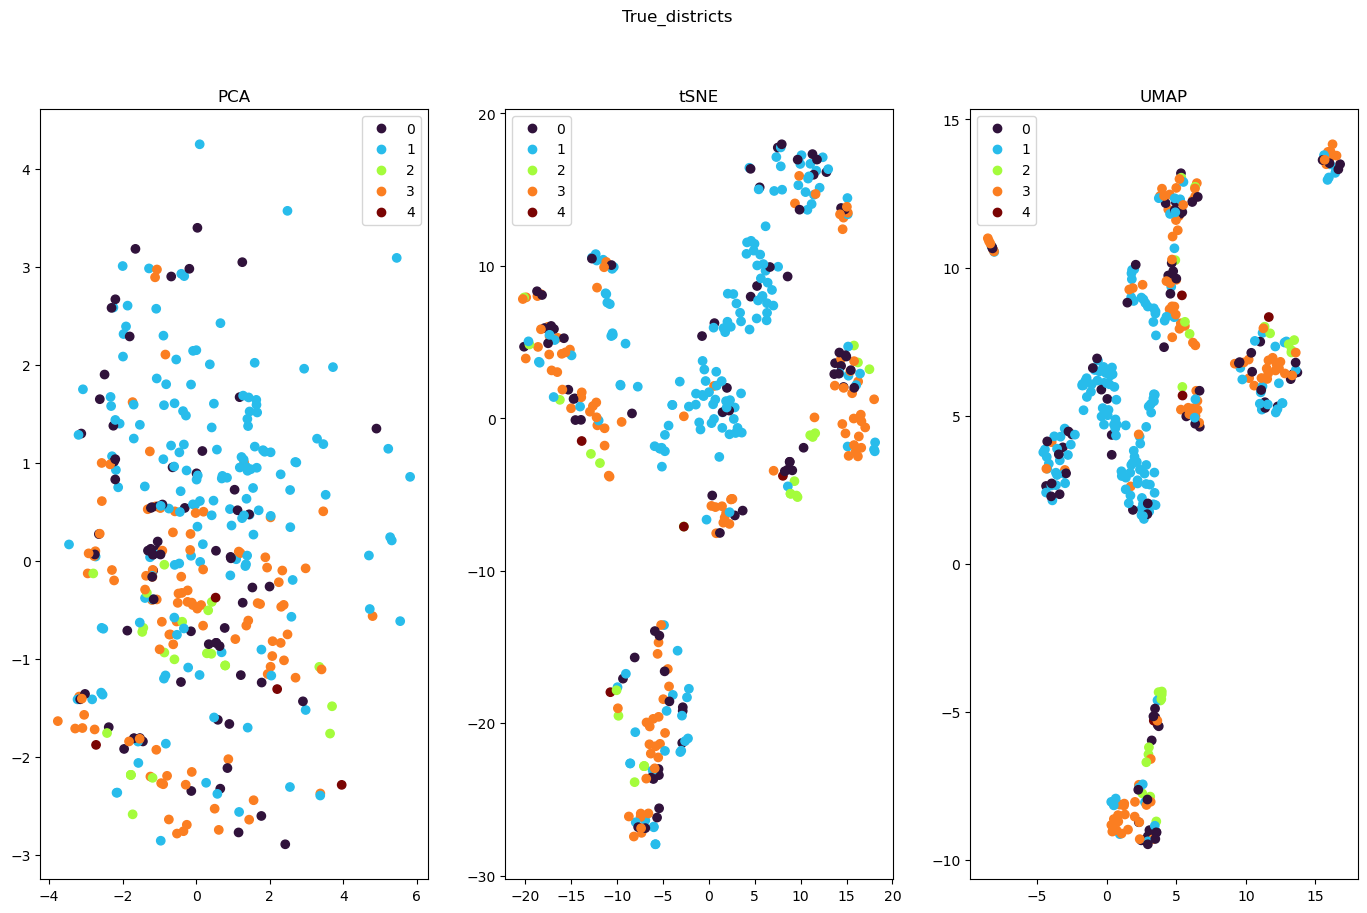

In [20]:
compare_clusters('True_districts', labels_1=true_districts)

Никакой очевидной структуры не наблюдается.

# Кластеризация KMeans

In [21]:
import matplotlib.pyplot as plt

def optim_clust_num(model, data, interval):
    inertia = []
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 4)
    for i in range(1, interval+1):
        model.n_clusters = i
        model.fit(scaled_data)
        inertia_i = model.inertia_
        inertia.append(inertia_i)
    ax1.set_title("The inertia plot")
    ax1.set_xlabel("n_clusters")
    ax1.set_ylabel("inertia")
    ax1.plot(range(1, interval+1), inertia, marker='o');
    
    delta_inertia = []
    for i in range(1,interval-1):
        delta_inertia_i = (inertia[i] - inertia[i+1]) / (inertia[i-1] - inertia[i])
        delta_inertia.append(delta_inertia_i)
    ax2.set_title("The delta of inertia plot")
    ax2.set_xlabel("n_clusters")
    ax2.set_ylabel("delta_inertia")
    ax2.plot(range(2,interval), delta_inertia, marker='o');
    
    
def silhouette_sc_clusters_list(model, data, interval):
    
    from sklearn.metrics import silhouette_score
    silhouette_sc = []
    plt.figure(figsize=(10, 4))
    clusterer = model
    
    list_n_clusters = list(range(2, interval + 1))
    for n_clusters in list_n_clusters:
        clusterer.n_clusters = n_clusters
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_sc.append(silhouette_avg)

    plt.gca().set(title="The silhouette_score plot",
            xlabel="n_clusters",
            ylabel="silhouette_score")
    plt.plot(range(2,interval+1), silhouette_sc, marker='o');
    plt.legend()
    plt.show()

In [22]:
def silhouette_for_clusters(model, data, list_n_clusters):
    
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    
    print('For model', model)
    for n_clusters in list_n_clusters:

        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value.
        clusterer = model
        clusterer.n_clusters = n_clusters
        cluster_labels = clusterer.fit_predict(data)

        # Compute the average silhouette_score.
        silhouette_avg = silhouette_score(data, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        y_lower = 10
        
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        for i in range(n_clusters):           
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

Попробуем найти оптимальное число кластеров для KMeans.

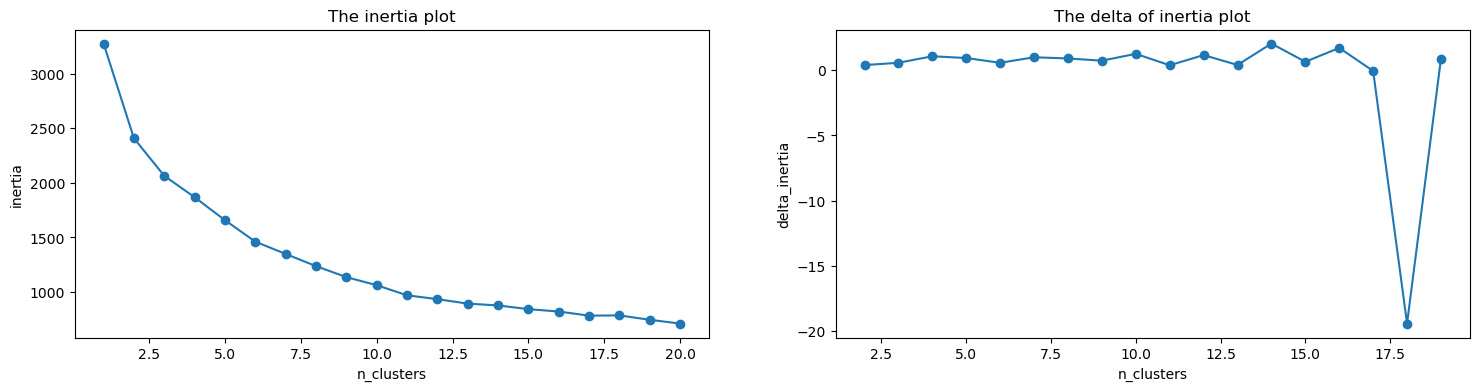

In [23]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(random_state=42, n_init='auto')
optim_clust_num(kmeans_model, scaled_data, 20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


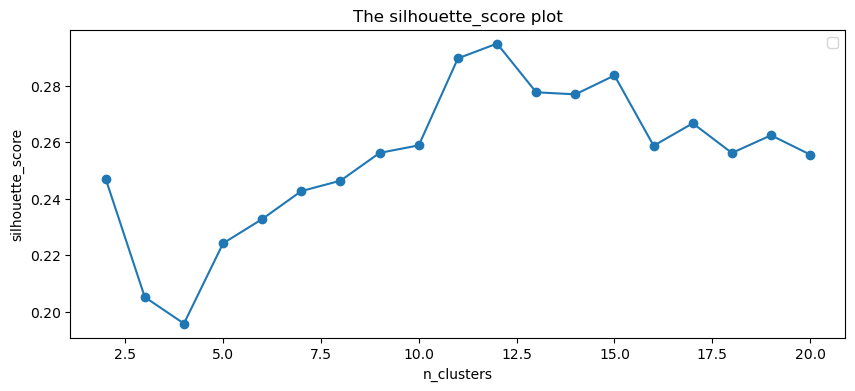

In [24]:
kmeans_model = KMeans(random_state=42, n_init='auto')
silhouette_sc_clusters_list(kmeans_model, scaled_data, 20)

На графиках нет ни очевидного "локтя", ни значительного минимума силуэтного коэффициента. Поэтому эмпирическим подбором разбиение будем проводить на 13 кластеров.

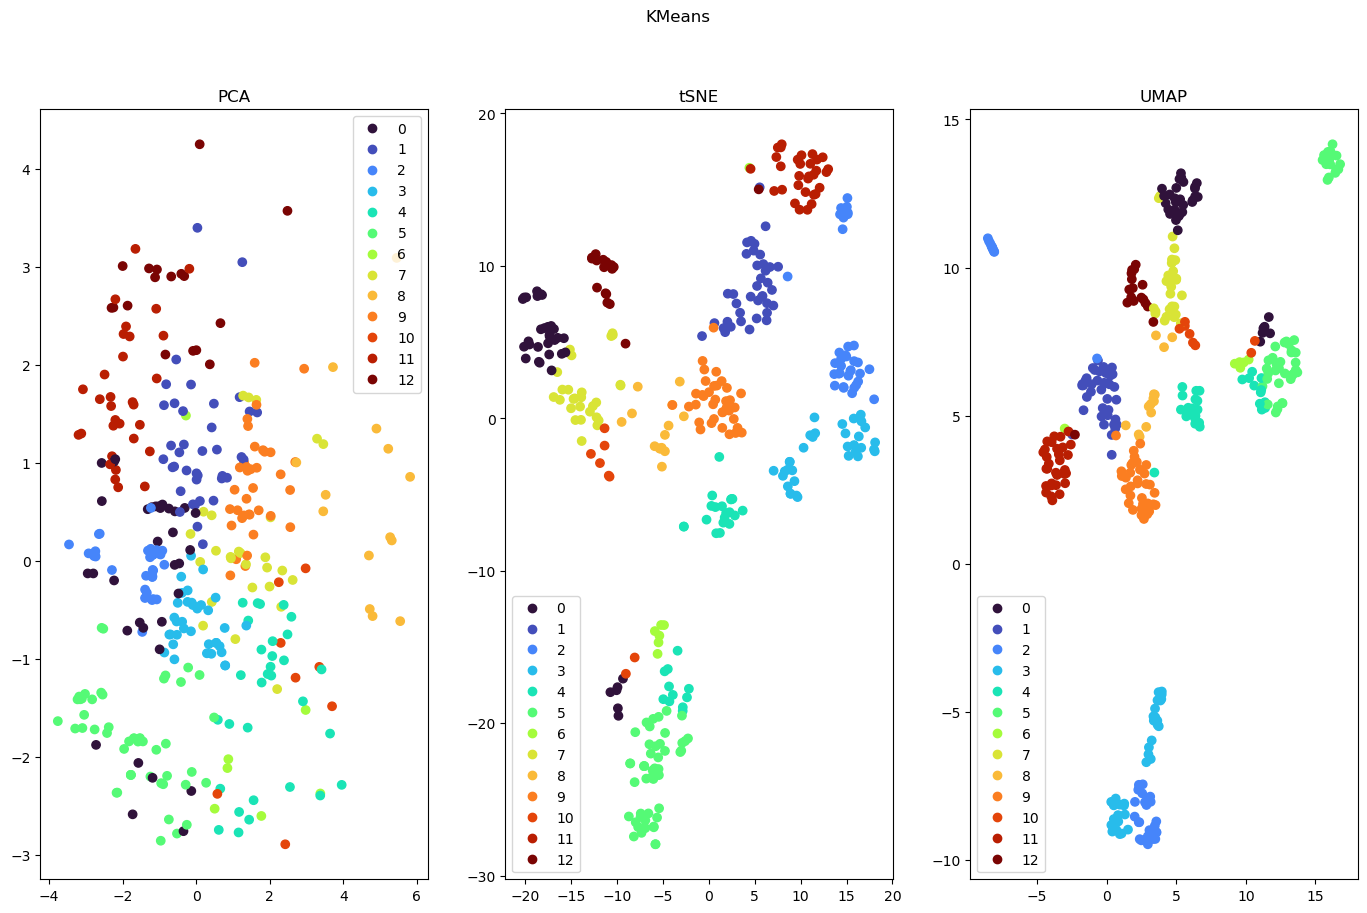

In [25]:
cluster_number = 13

kmeans_model = KMeans(n_clusters=cluster_number, n_init='auto', random_state=15).fit(scaled_data)
kmeans_labels = kmeans_model.labels_

compare_clusters('KMeans', kmeans_labels)

# Кластеризация AgglomerativeClustering

Аналогично попробуем подобрать оптимальное количество кластеров.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


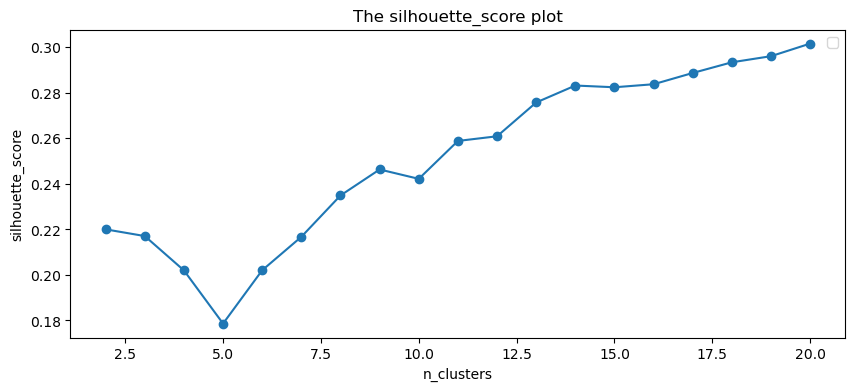

In [26]:
from sklearn.cluster import AgglomerativeClustering
agglom_model = AgglomerativeClustering()
silhouette_sc_clusters_list(agglom_model, scaled_data, 20)

В этом случае также эмпирически было подобрано значение 14.

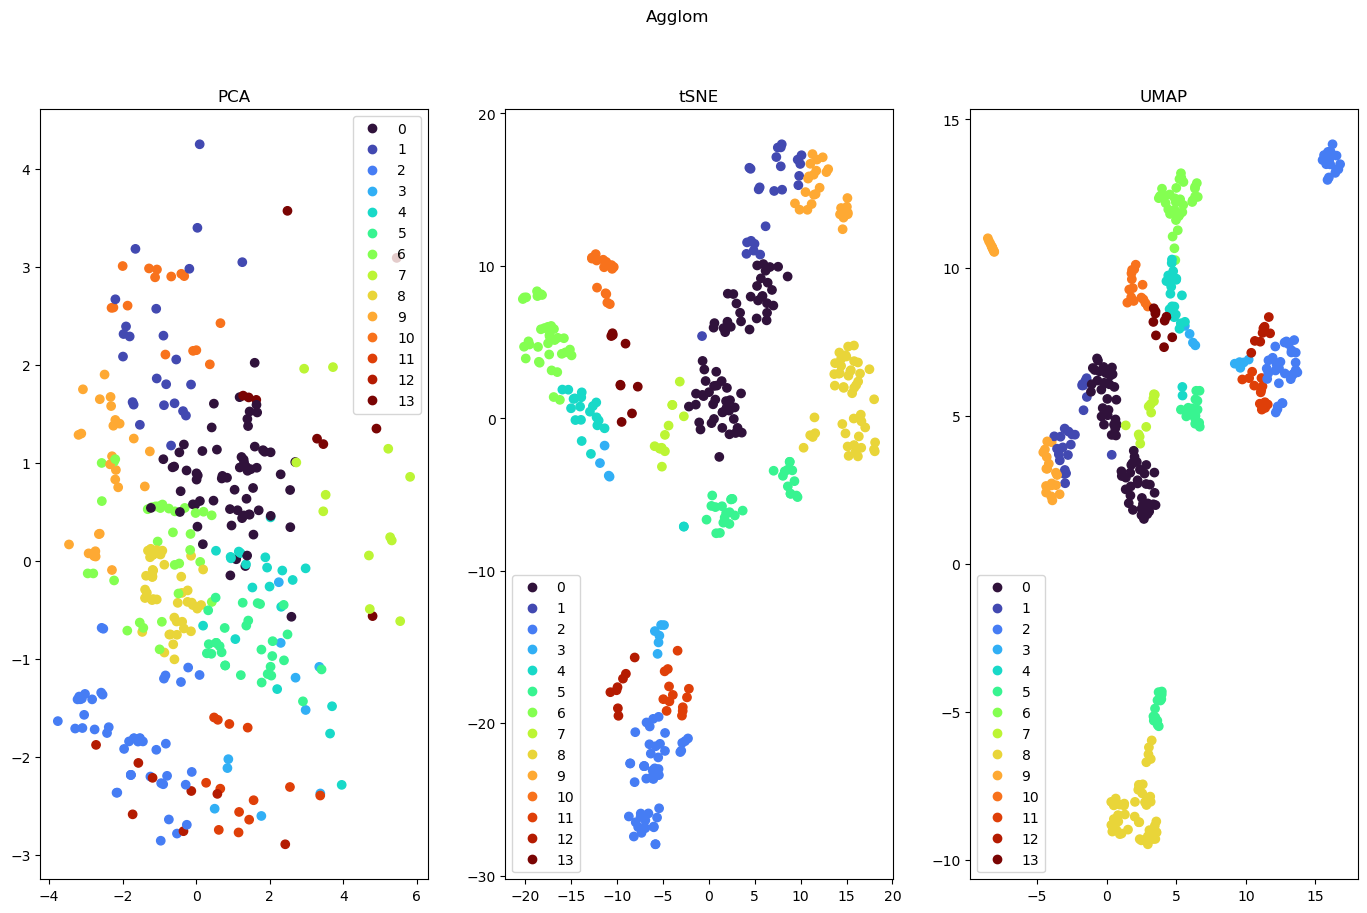

In [27]:
from sklearn.cluster import AgglomerativeClustering

cluster_number = 14

kmeans_model = KMeans(n_clusters=cluster_number, n_init='auto', random_state=15).fit(scaled_data)
kmeans_labels = kmeans_model.labels_

agglom_model = AgglomerativeClustering(n_clusters=cluster_number).fit(scaled_data)
agglom_labels = agglom_model.labels_
compare_clusters('Agglom', agglom_labels)

Теперь сравним оба метода и реальную картину.

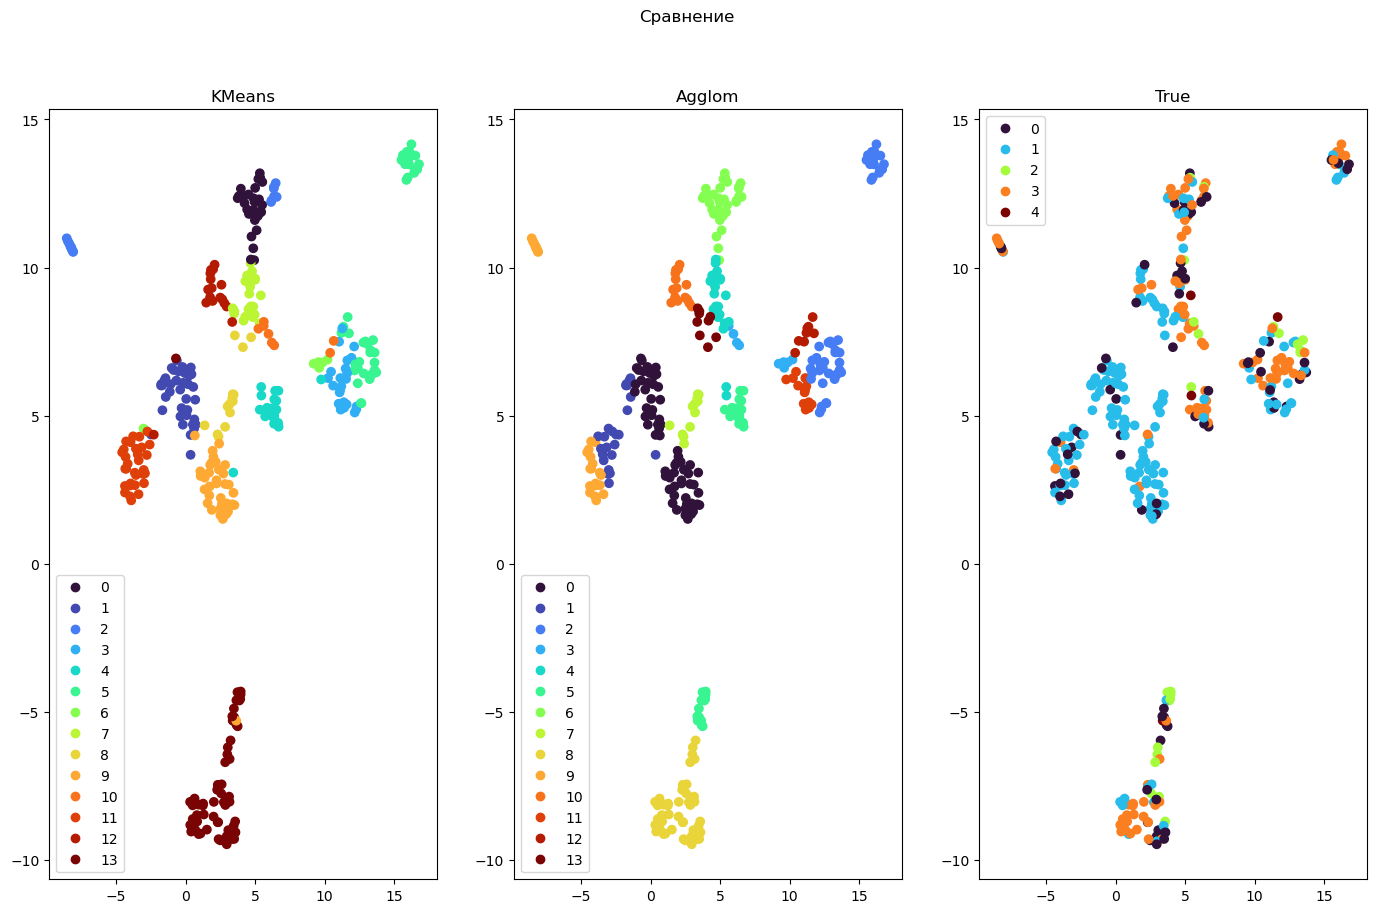

In [28]:
compare_clusters('Сравнение', labels_1=kmeans_labels, labels_2=agglom_labels, labels_3=true_districts,
                 reduced_data_1=umap_data, reduced_data_2=umap_data, reduced_data_3=umap_data,
                 titles_for_data=['KMeans', 'Agglom', 'True'])

В целом, и KMeans, и AgglomerativeClustering дали похожее разбиение, но оно далеко от реального распределения.

# Кластеризация DBSCAN

In [29]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=1.20, min_samples=3).fit(scaled_data)
dbscan_labels = dbscan_model.labels_

После экспериментов с параметрами наиболее адекватные группы получили при значении eps равном 1.2, и min_samples равном 3.

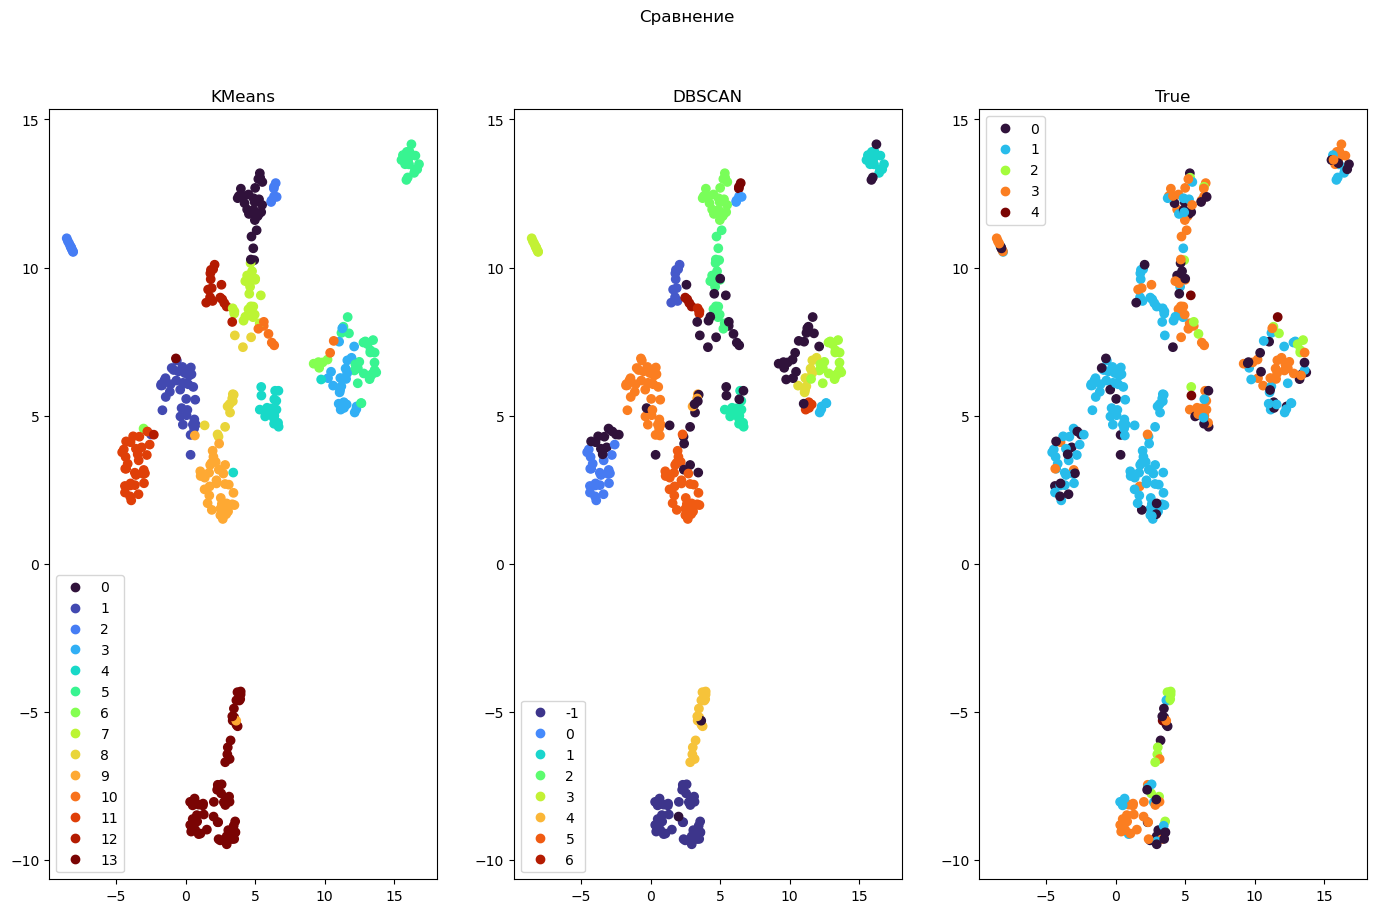

In [30]:
compare_clusters('Сравнение', labels_1=kmeans_labels, labels_2=dbscan_labels, labels_3=true_districts,
                 reduced_data_1=umap_data, reduced_data_2=umap_data, reduced_data_3=umap_data,
                 titles_for_data=['KMeans', 'DBSCAN', 'True'])

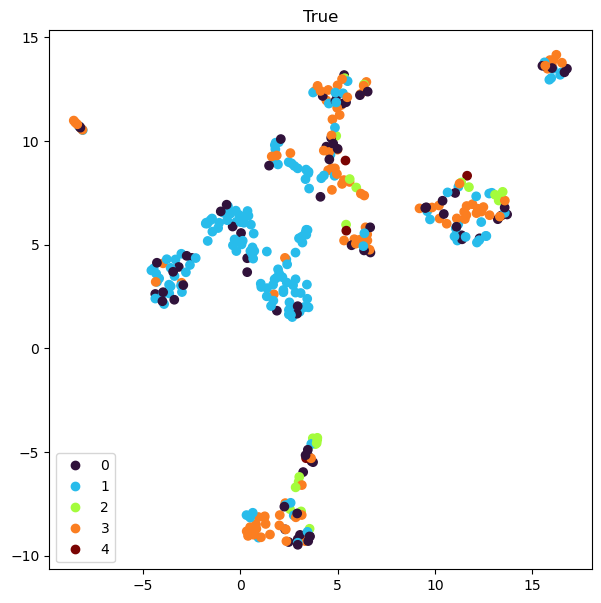

In [31]:
plot_clusters(umap_data, true_districts, 'True')

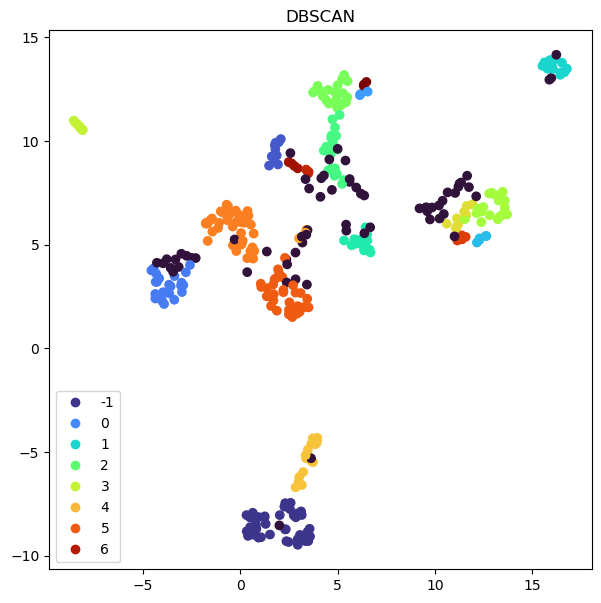

In [32]:
plot_clusters(umap_data, dbscan_labels, 'DBSCAN')

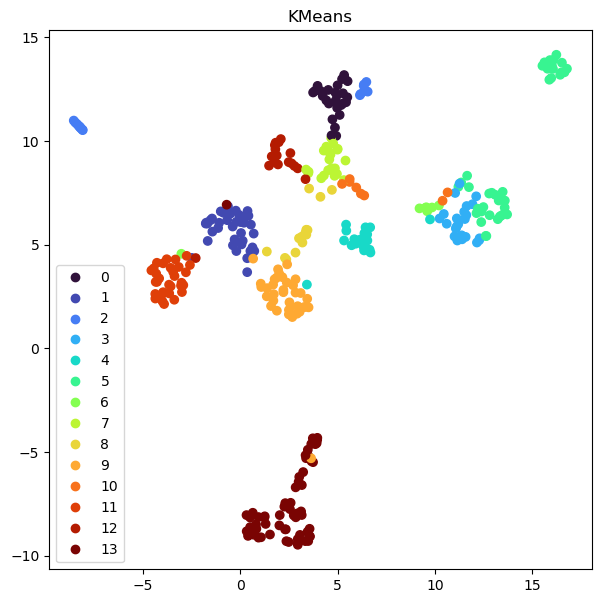

In [33]:
plot_clusters(umap_data, kmeans_labels, 'KMeans')

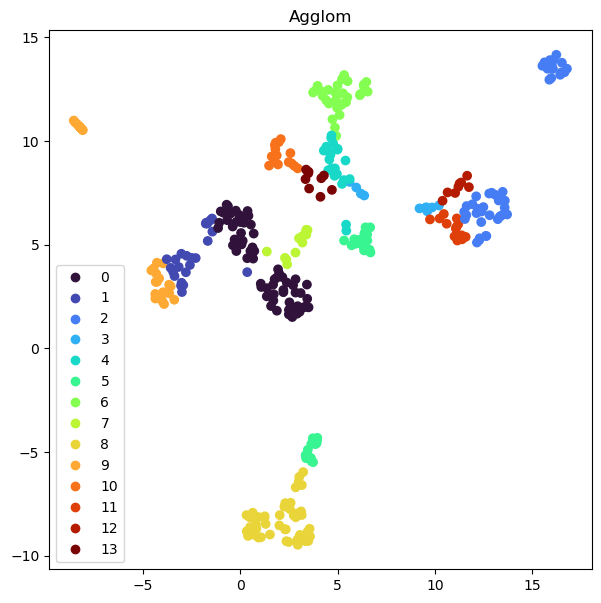

In [34]:
plot_clusters(umap_data, agglom_labels, 'Agglom')

# Проверка эффективности кластеризации

В связи с большим числом кластеров DBSCAN, они не полностью отображаются в легенде. Будем выводить по одному и сопоставлять с истинным значением района. Идея состоит в том чтобы объединить несколько мелких кластеров в более крупные, согласно их реальным районам. Из-за того, что наши кластера не очень чистые, сопоставление будем проводить по доминирующему району. Так мы сможем получить более сложные структуры.

Для обработки взяли результаты DBSCAN, как более чутко улавливающие границы реальных групп.

In [35]:
all_dbscan_clasters = pd.DataFrame(dbscan_labels,
                                   index=scaled_data.index, columns=['dbscan'])

In [36]:
all_dbscan_clasters[all_dbscan_clasters['dbscan'] == -1].count()

dbscan    67
dtype: int64

Элементы, которые модель отнесла к классу -1 (не кластеризованные) отбросим из анализа (их вышло 67).

In [37]:
all_dbscan_clasters['dbscan'].unique()

array([ 0,  1,  2,  3,  4, -1,  6,  5,  7,  8,  9, 10, 15, 11, 12, 13, 14,
       16, 17, 18, 19])

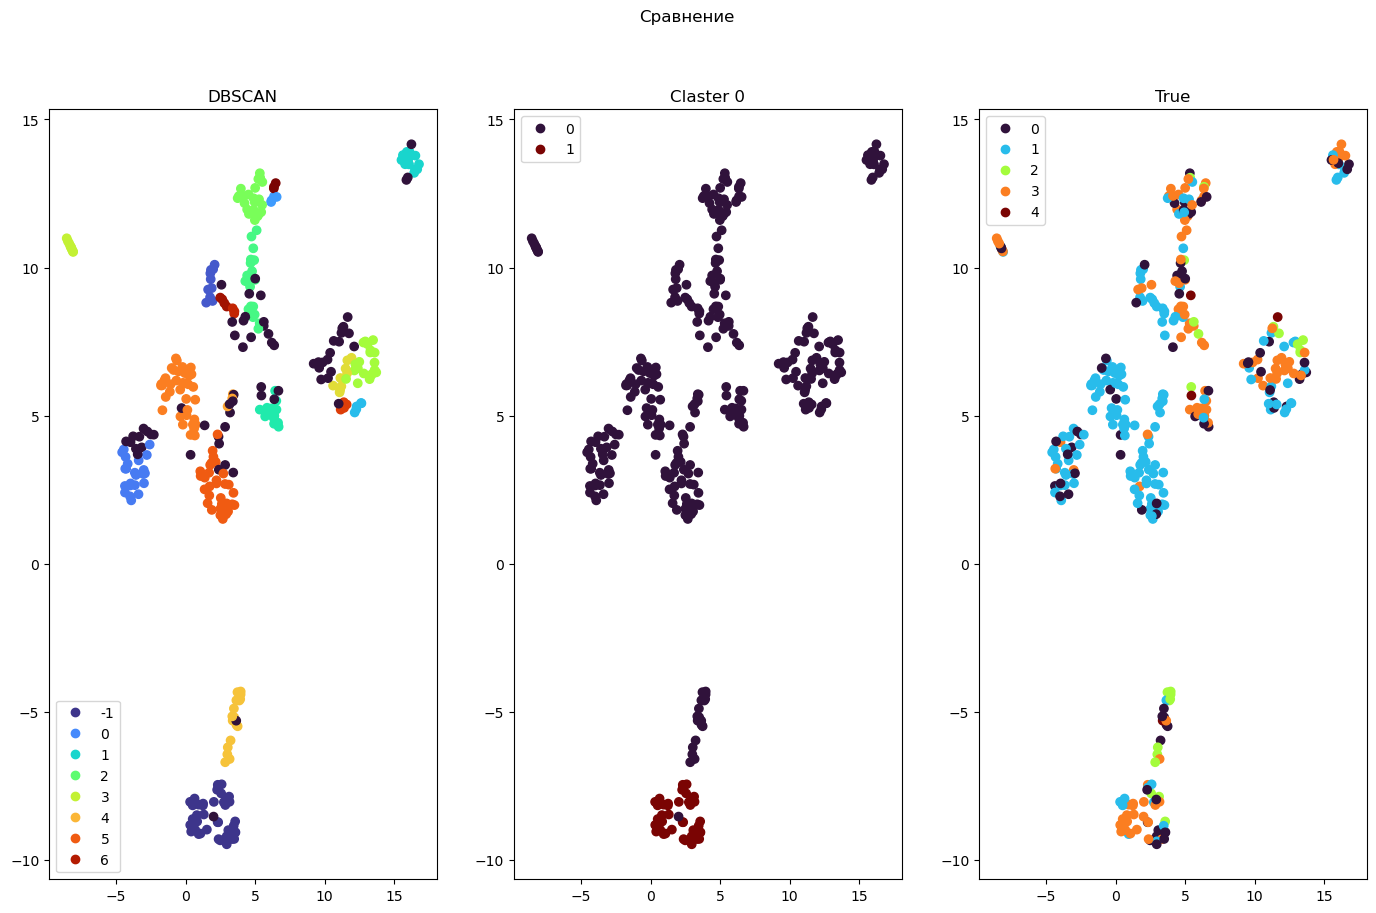

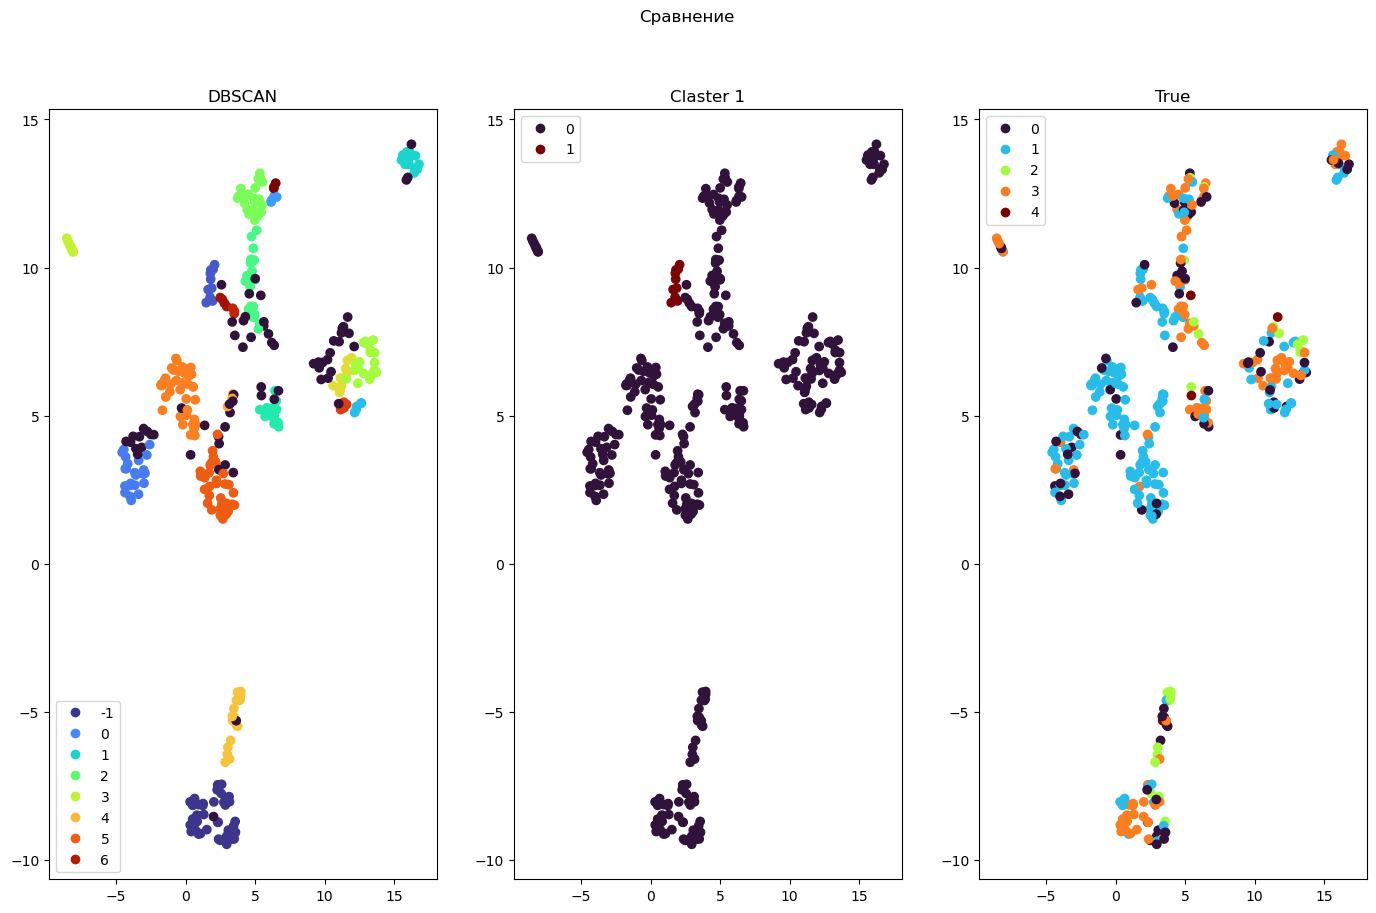

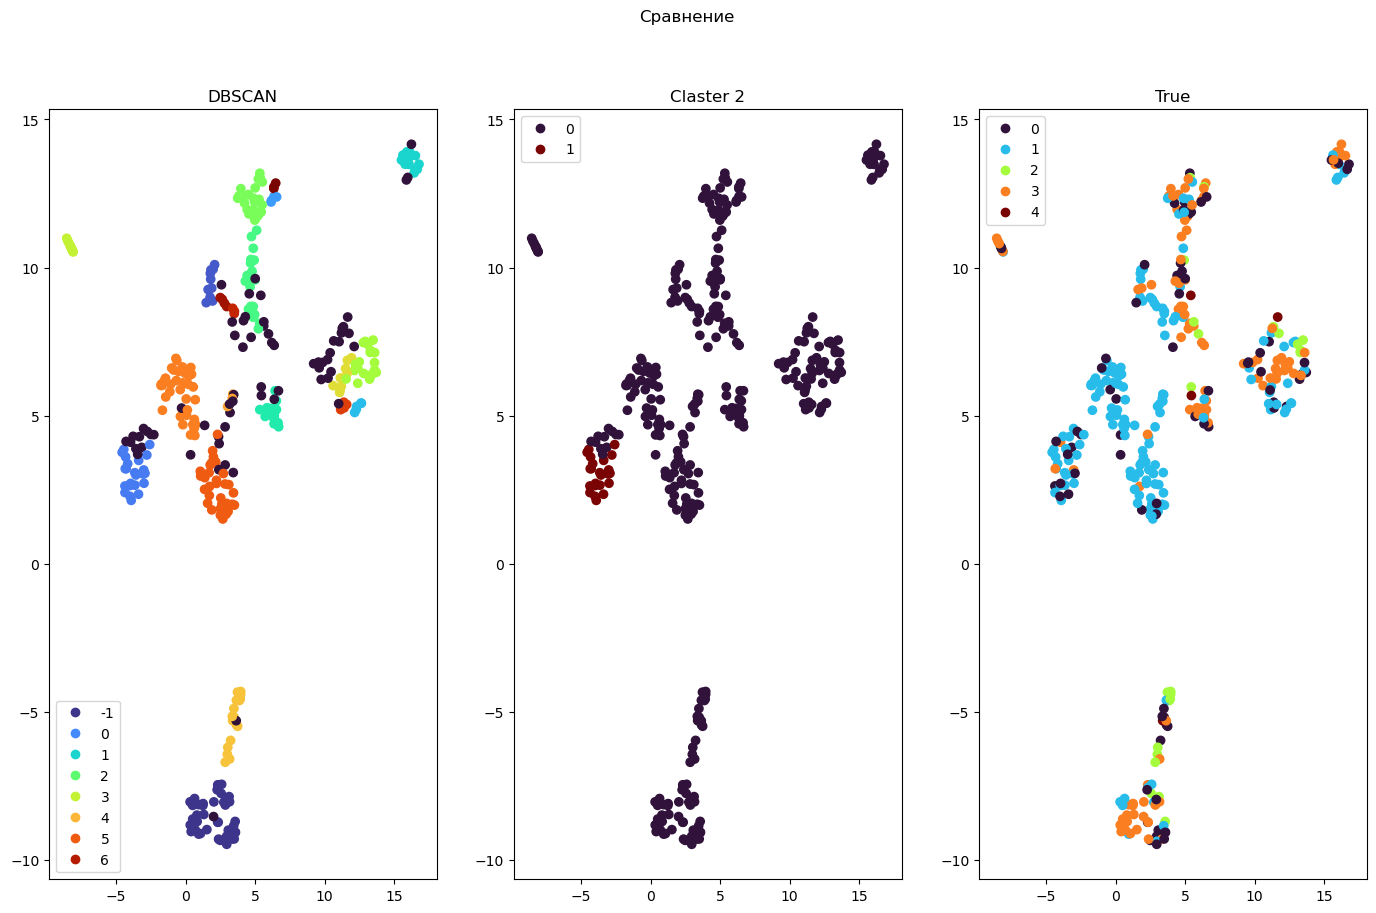

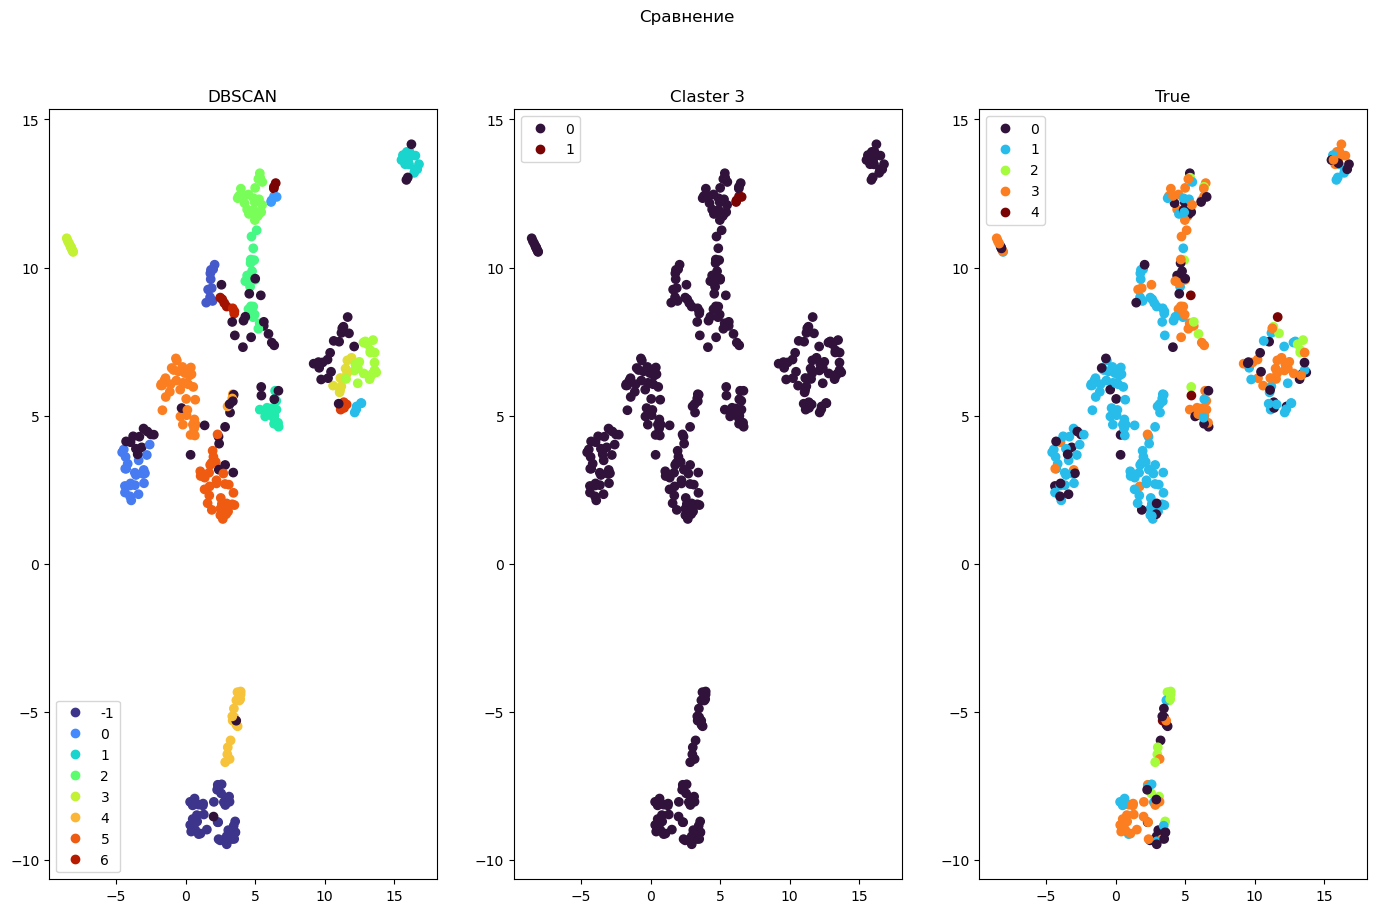

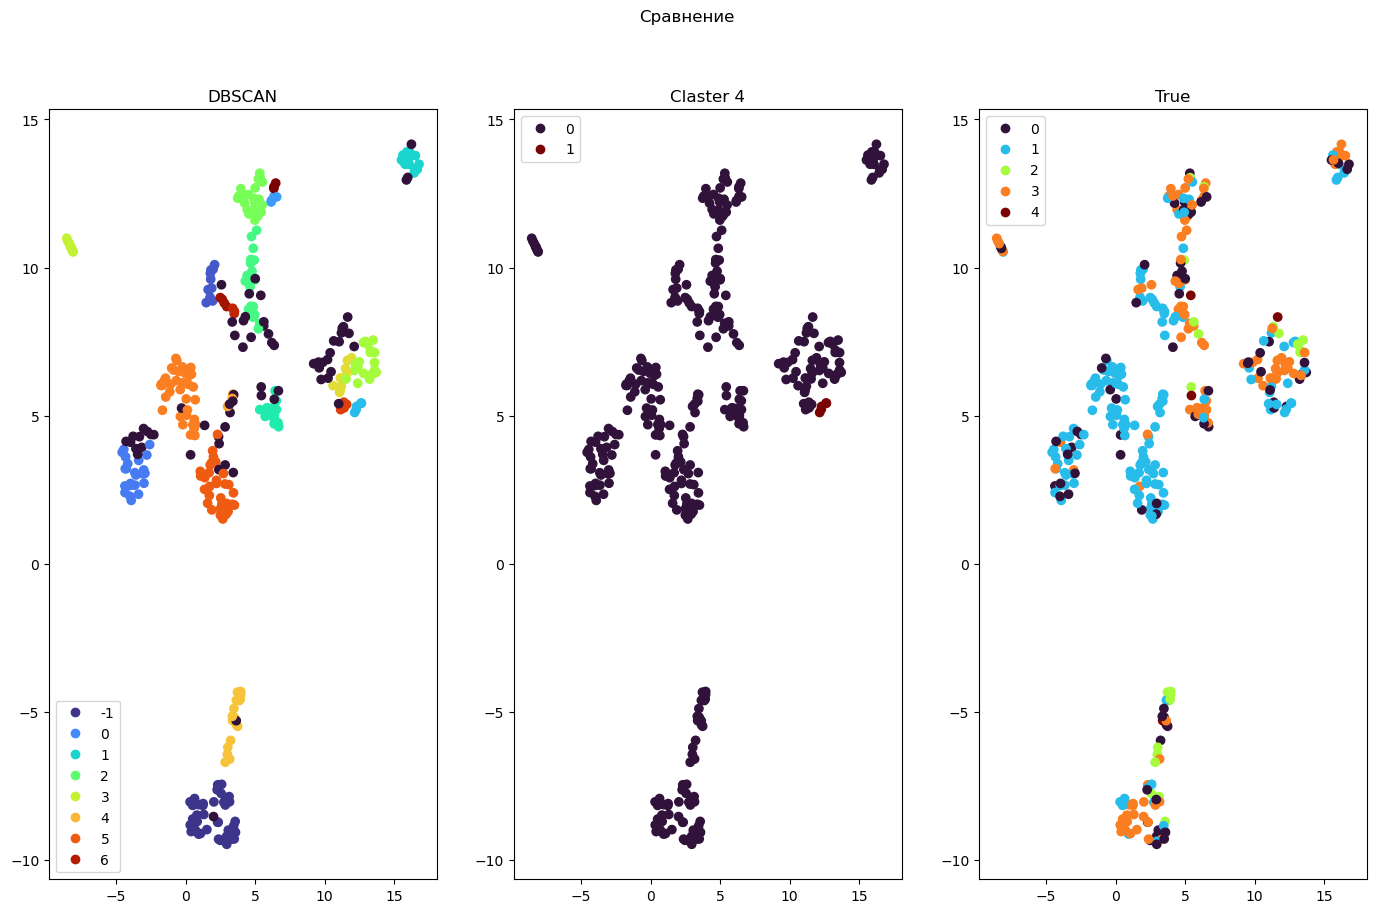

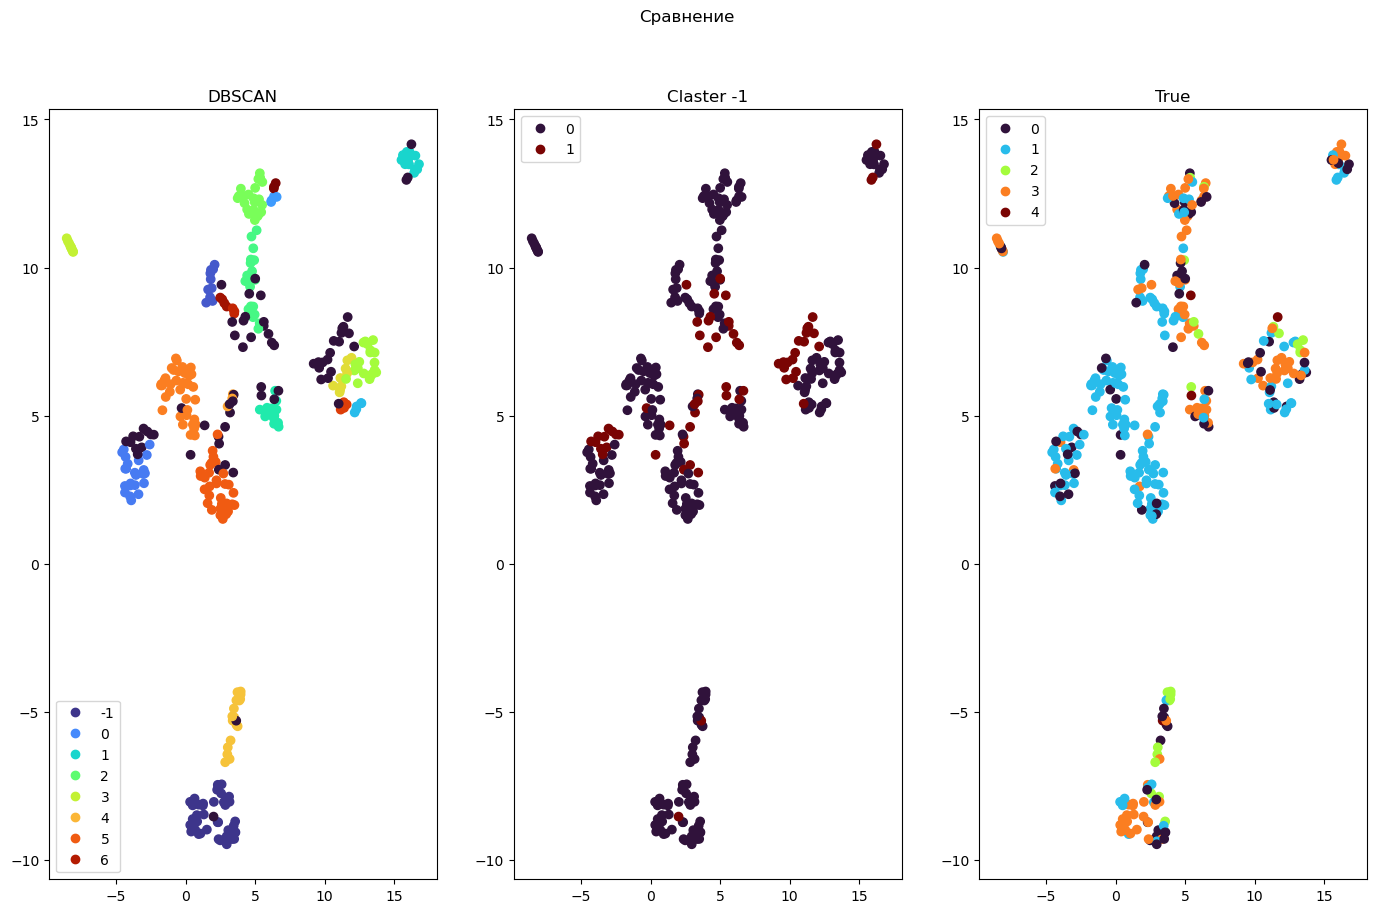

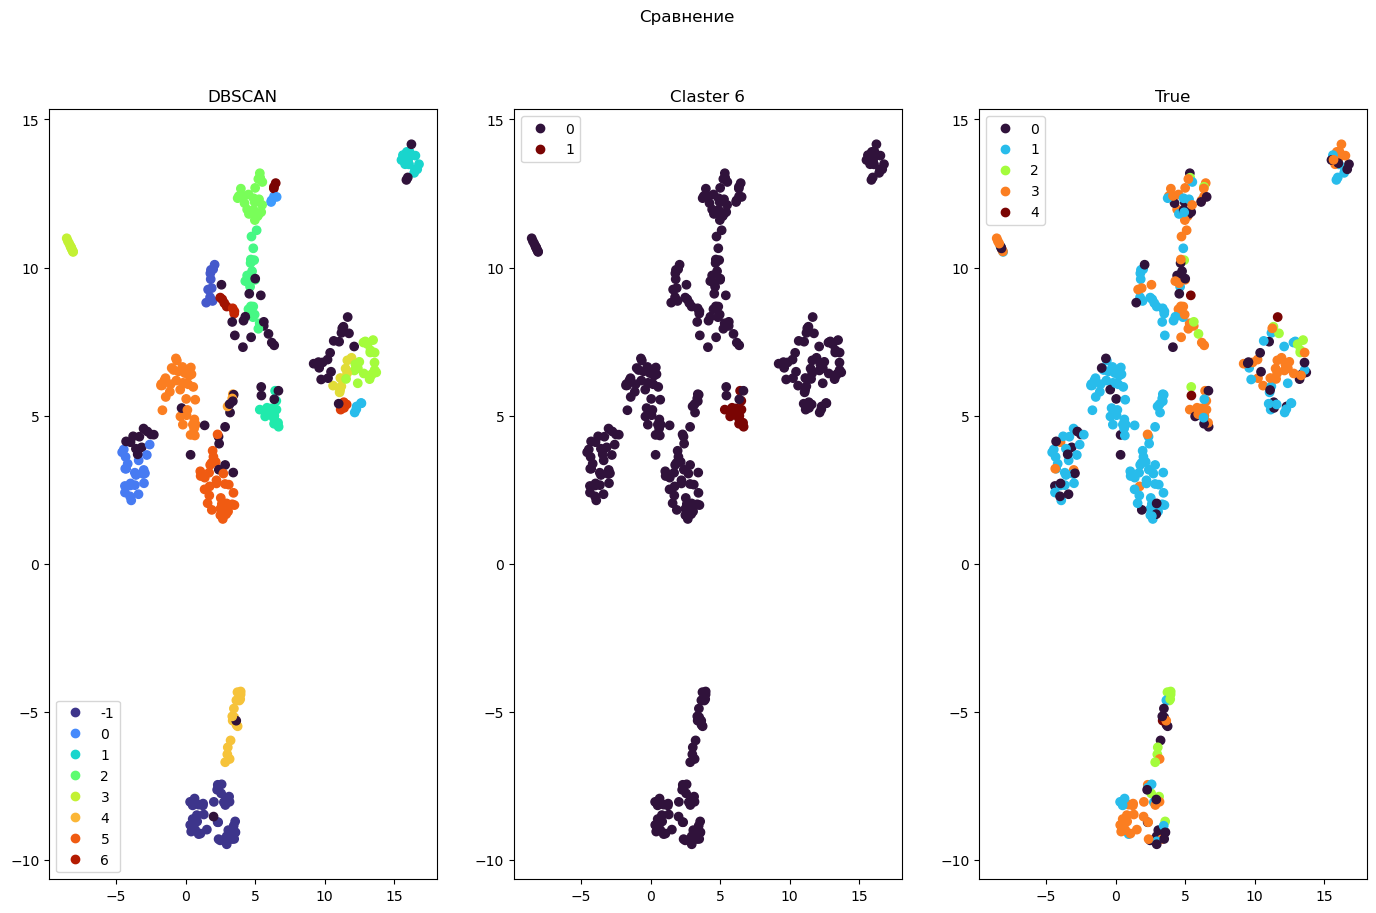

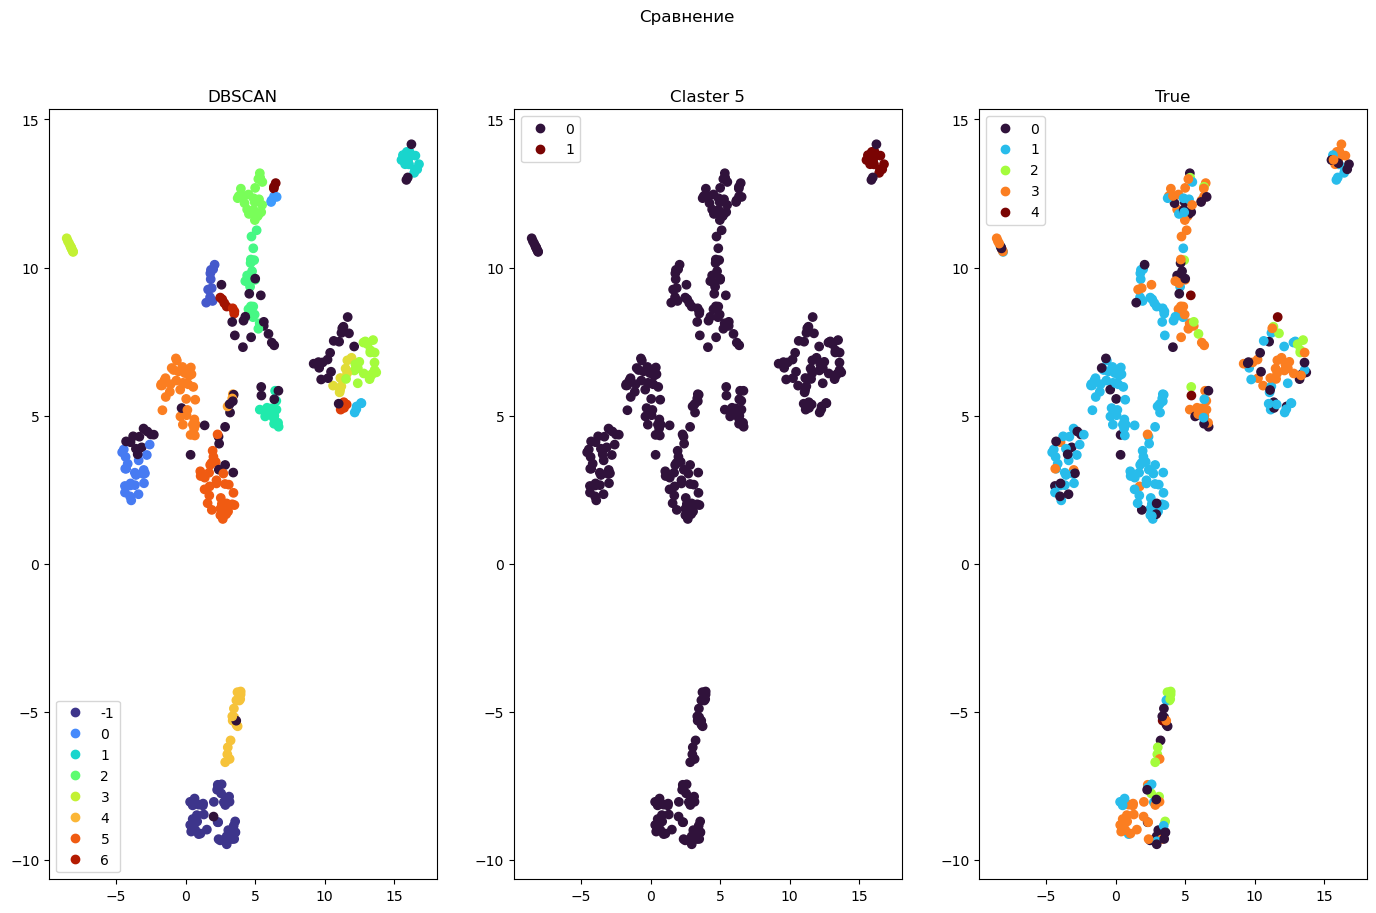

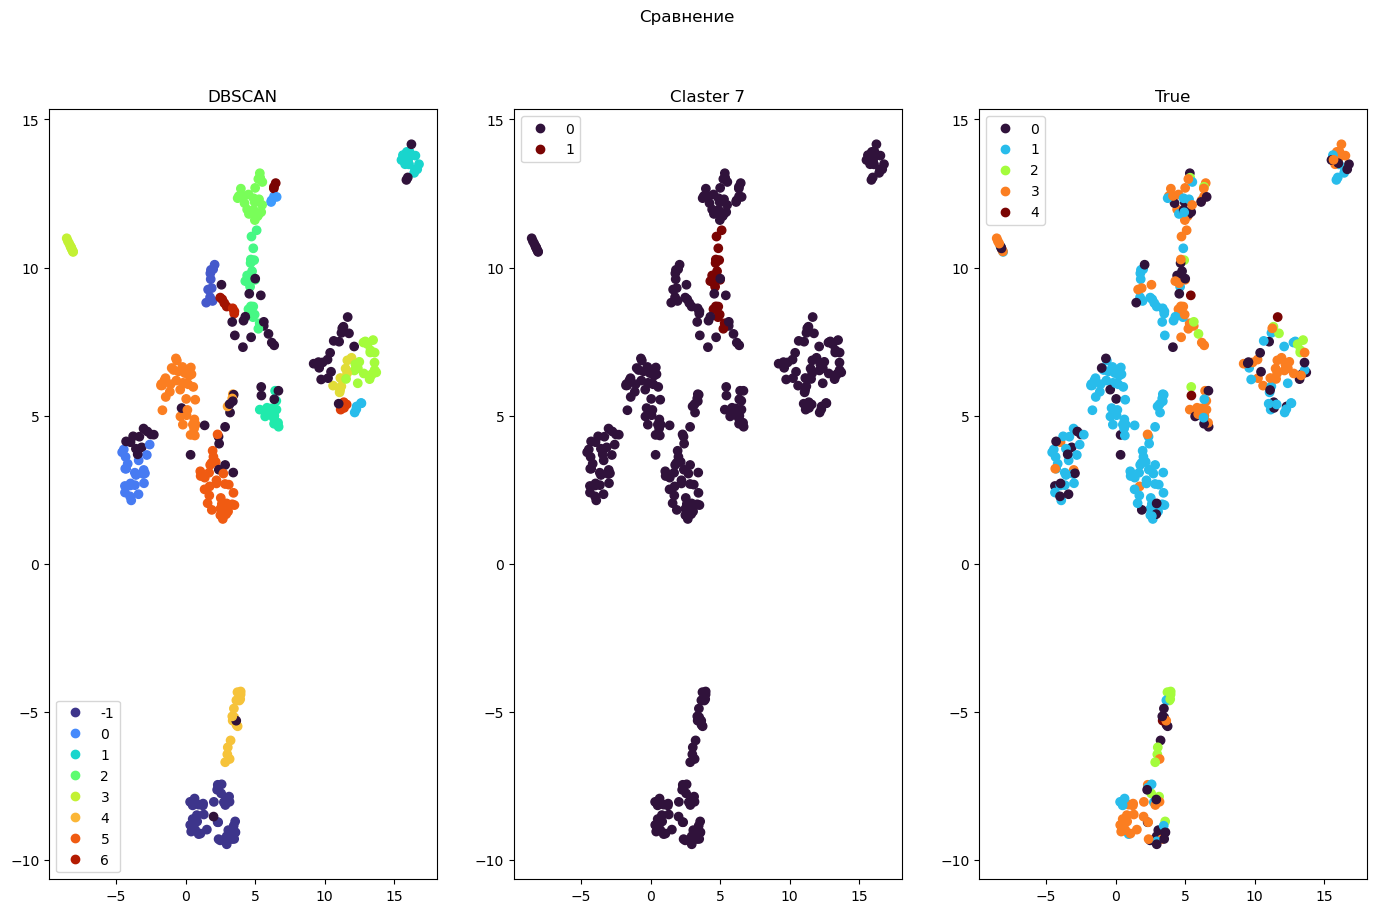

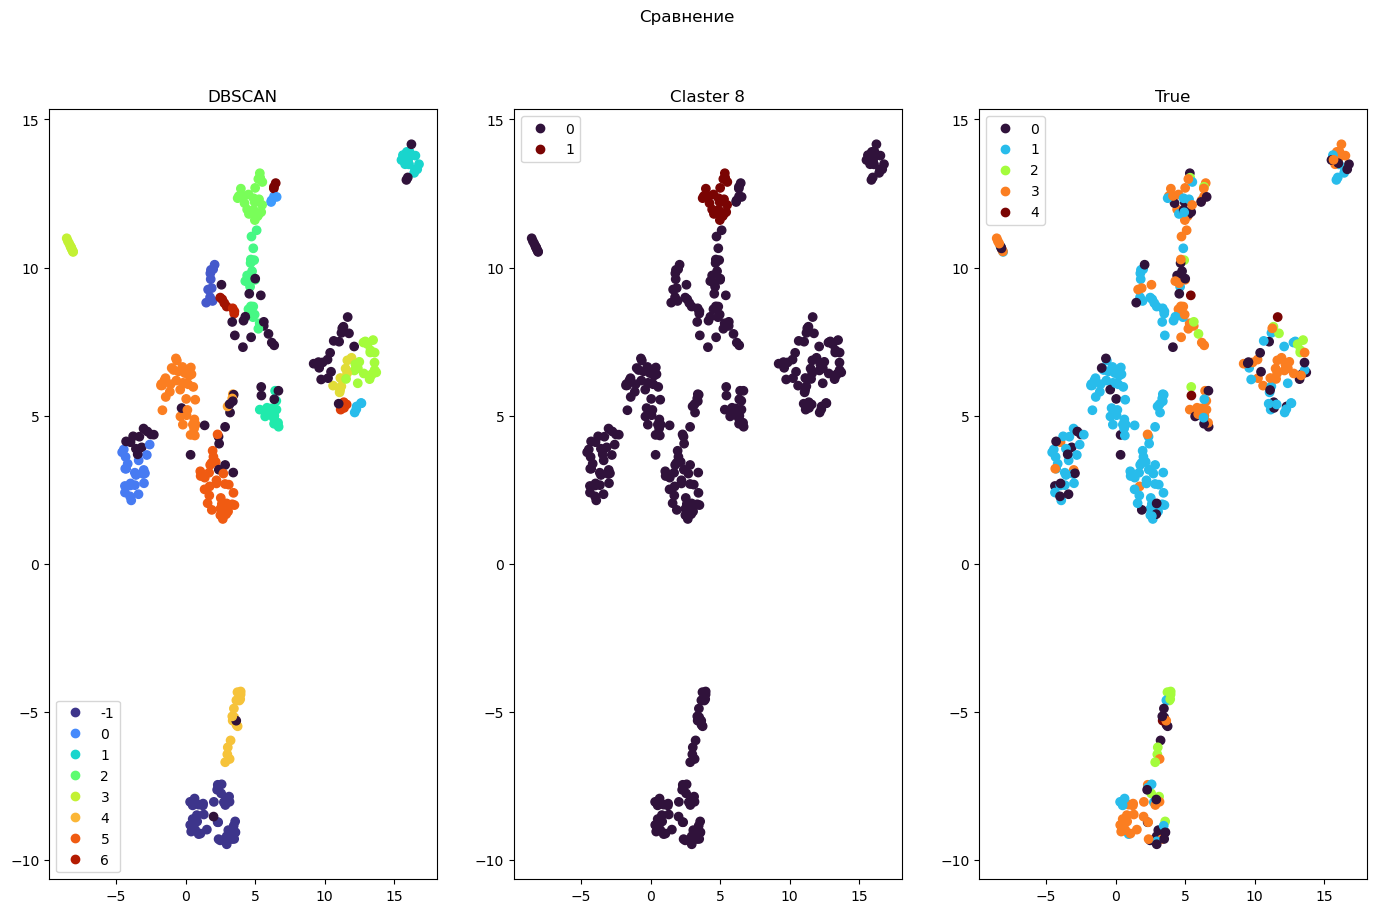

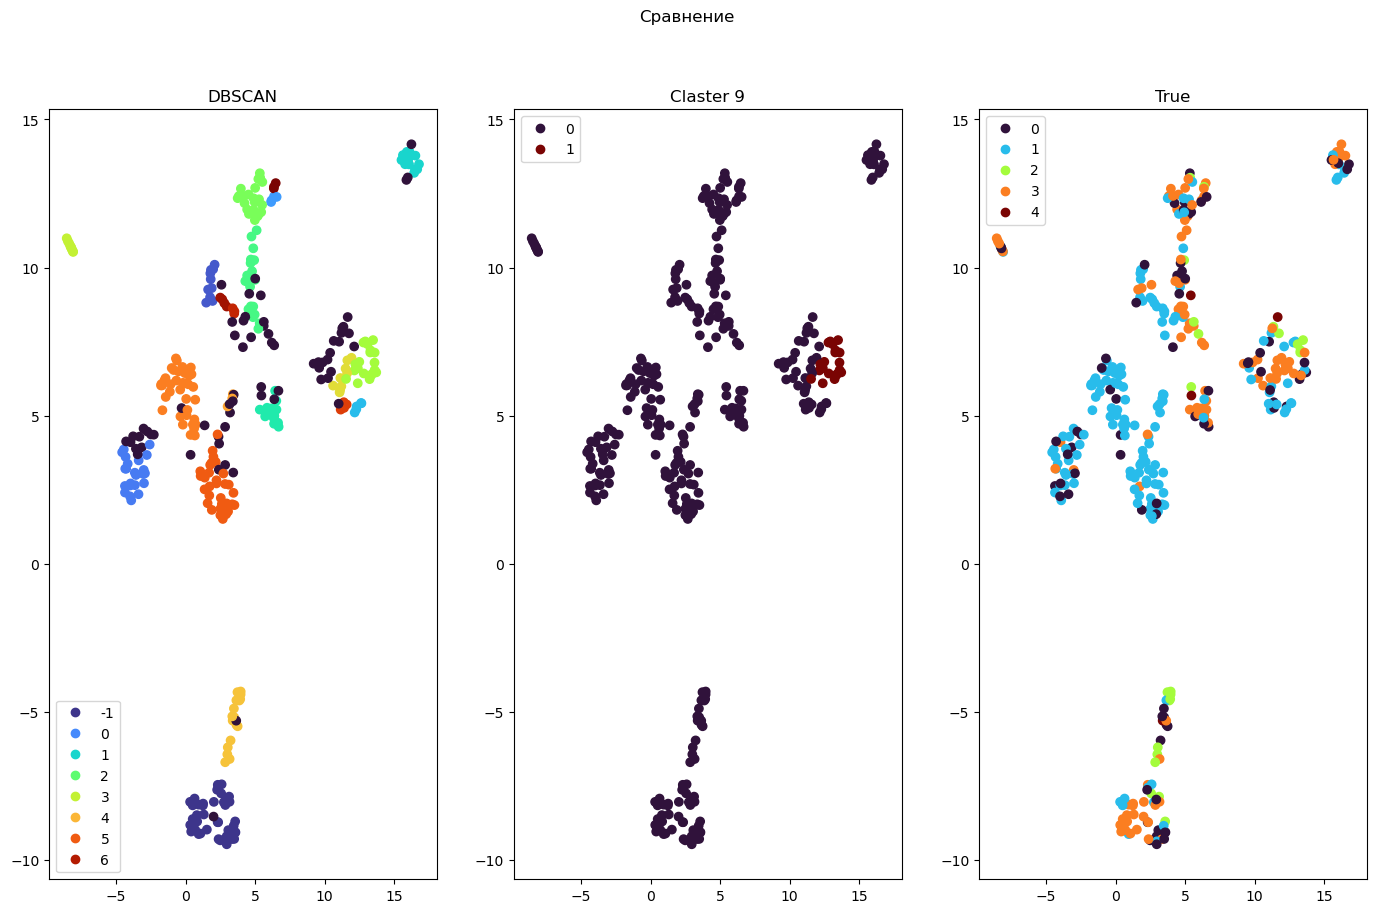

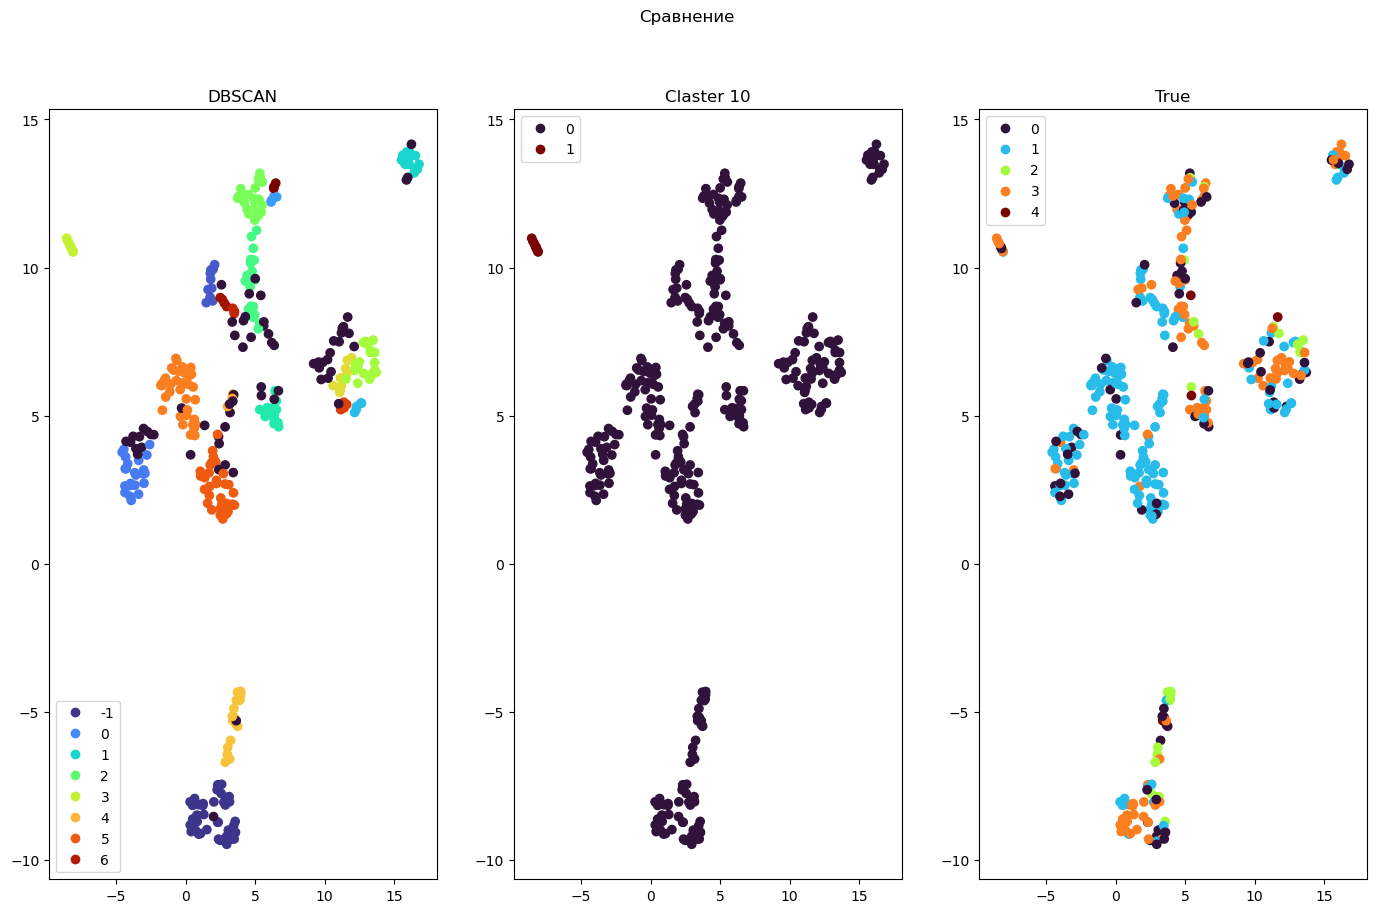

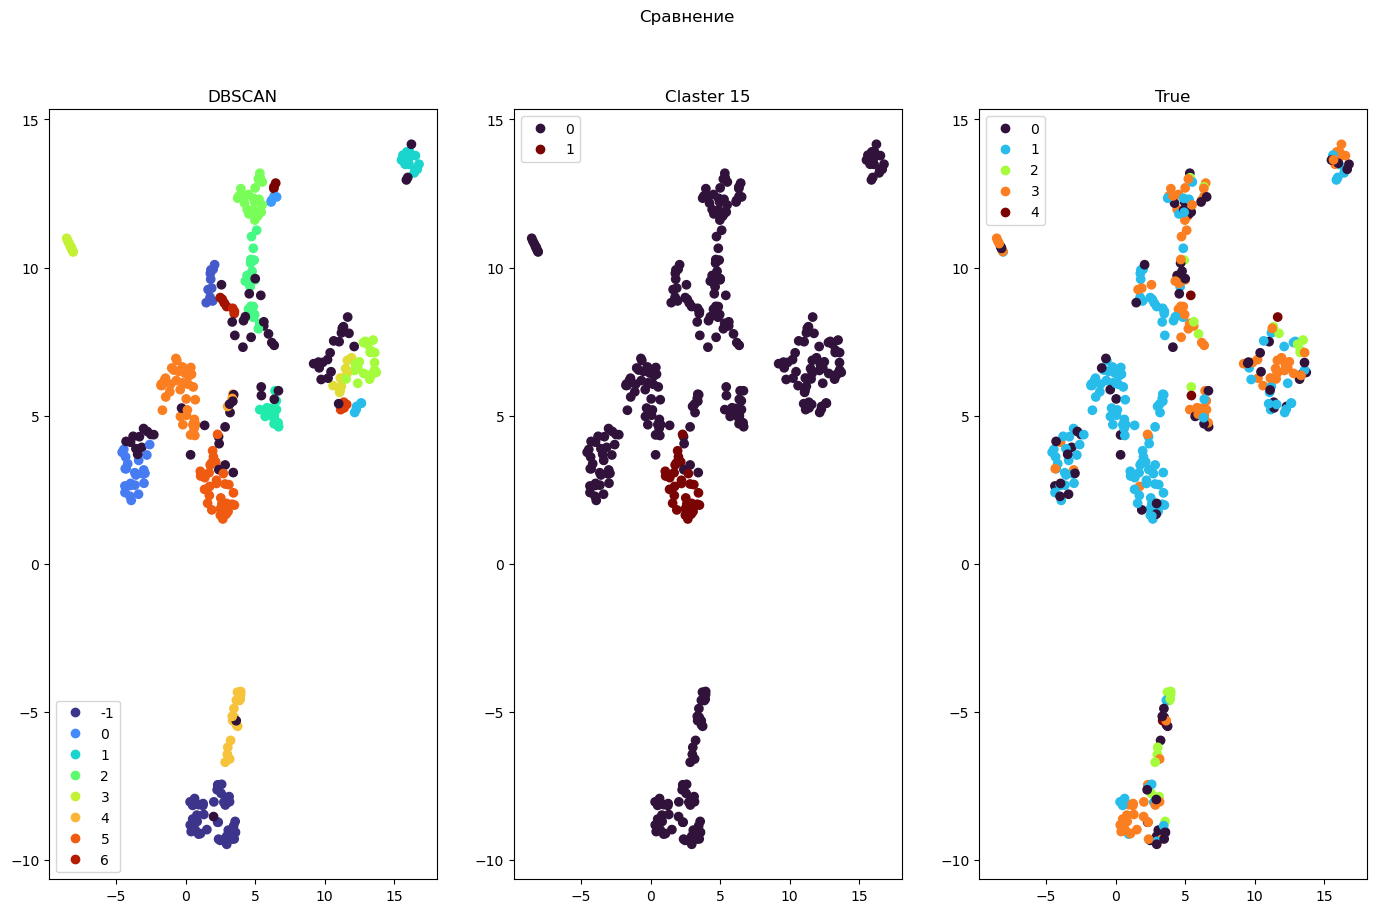

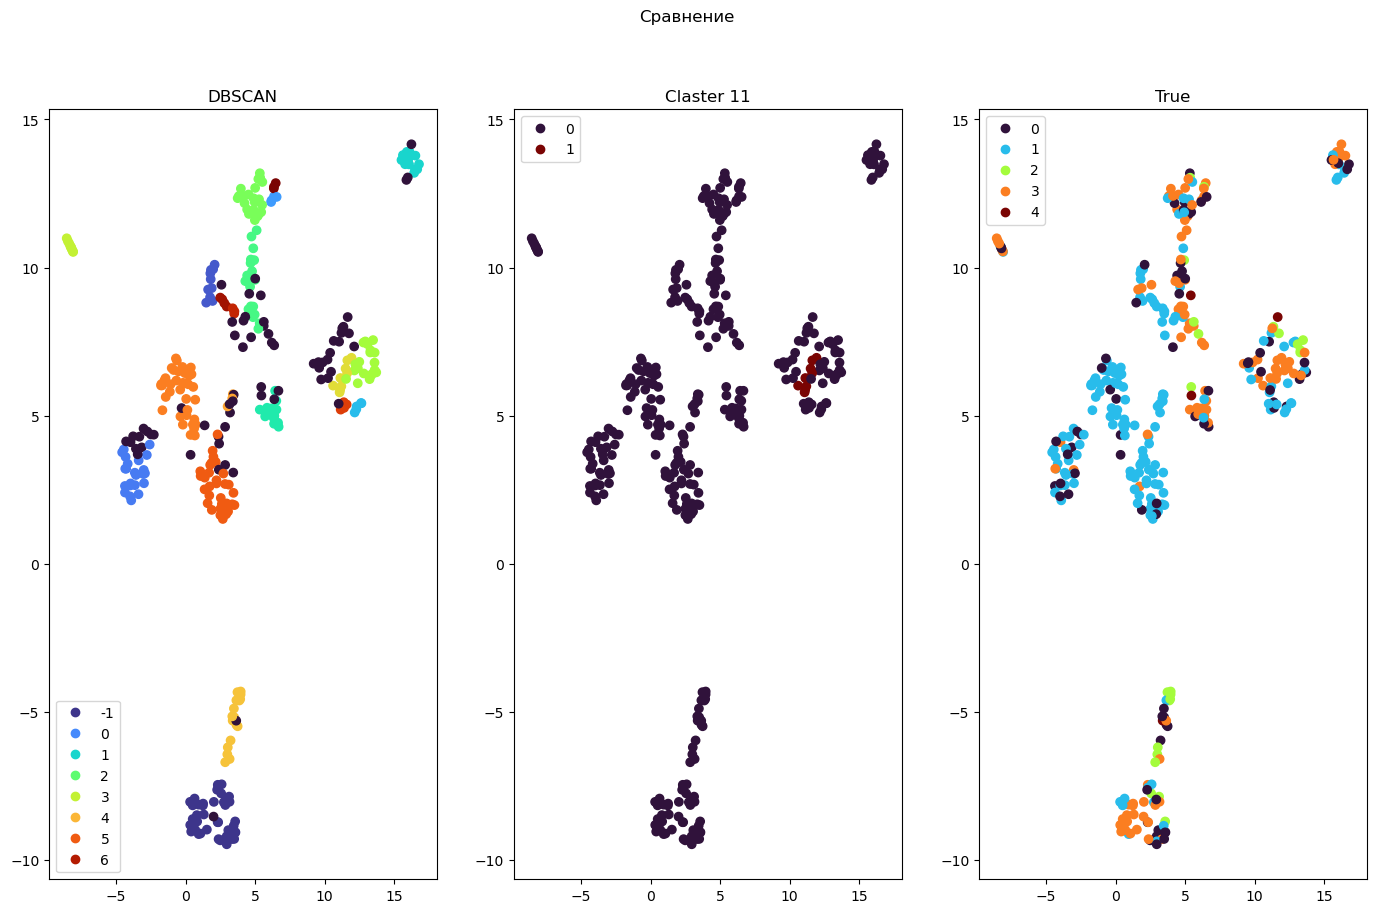

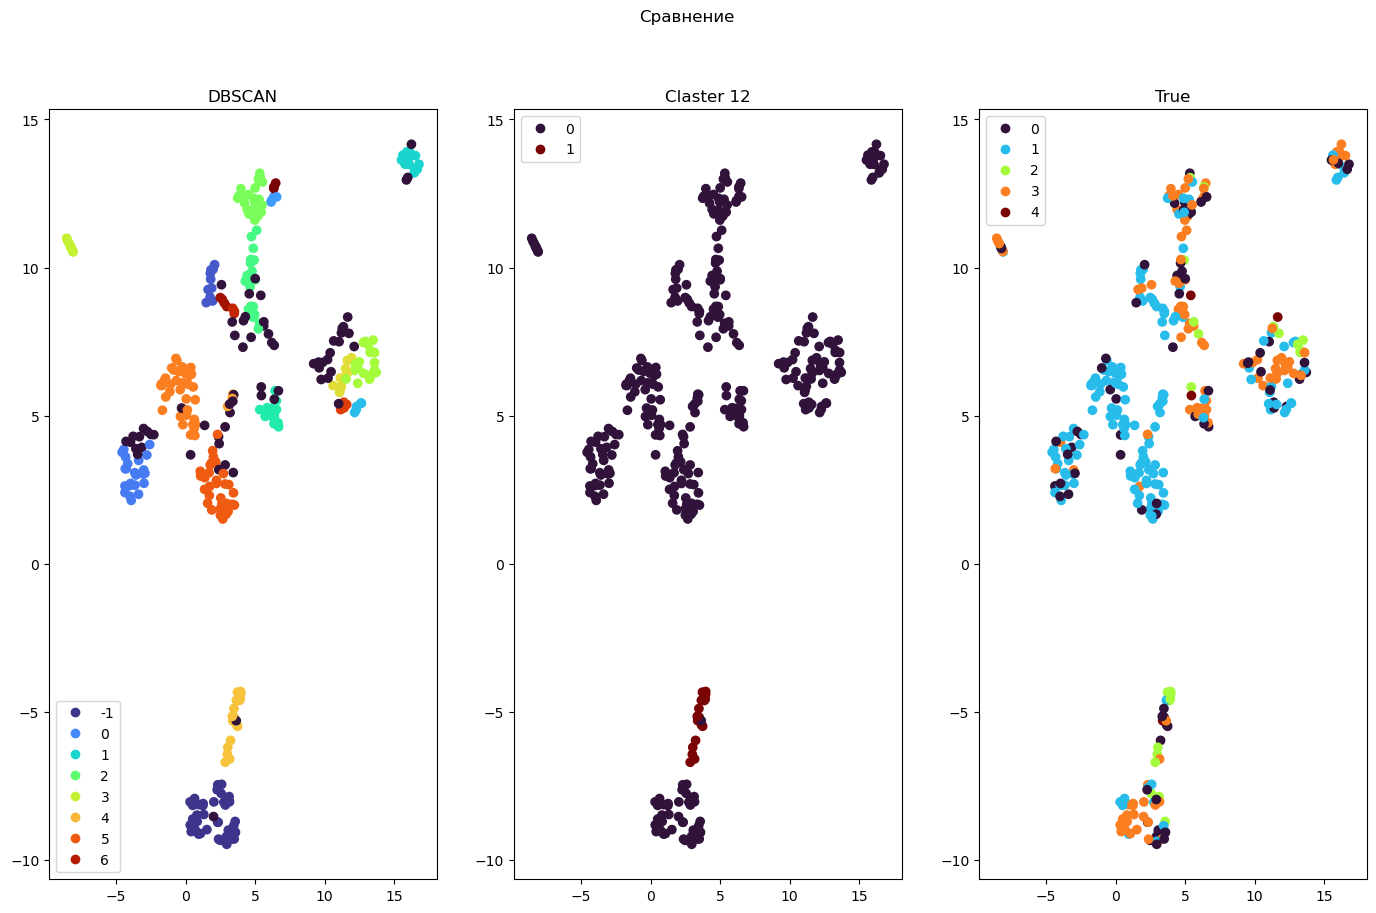

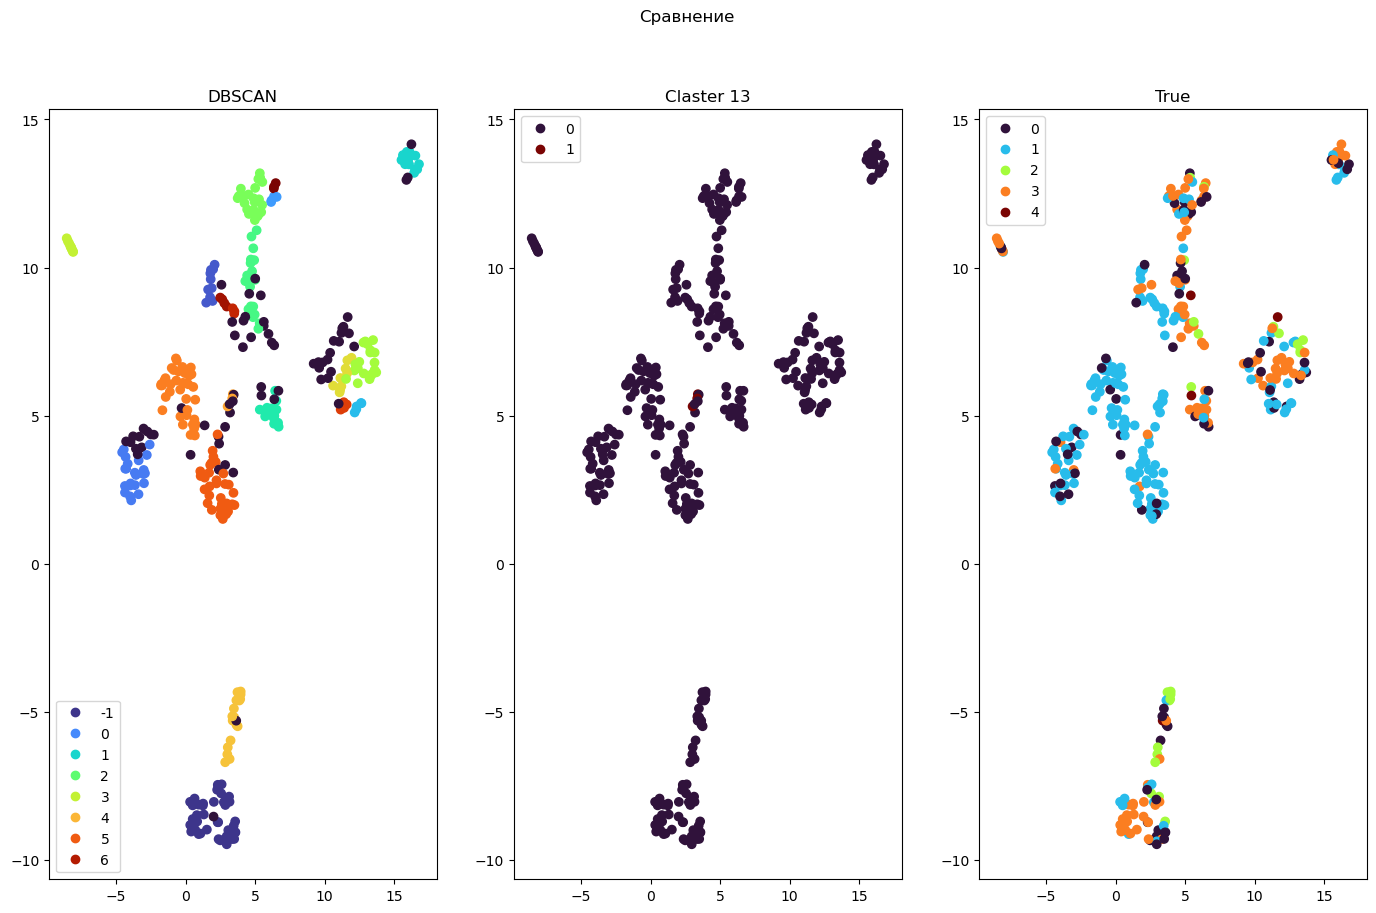

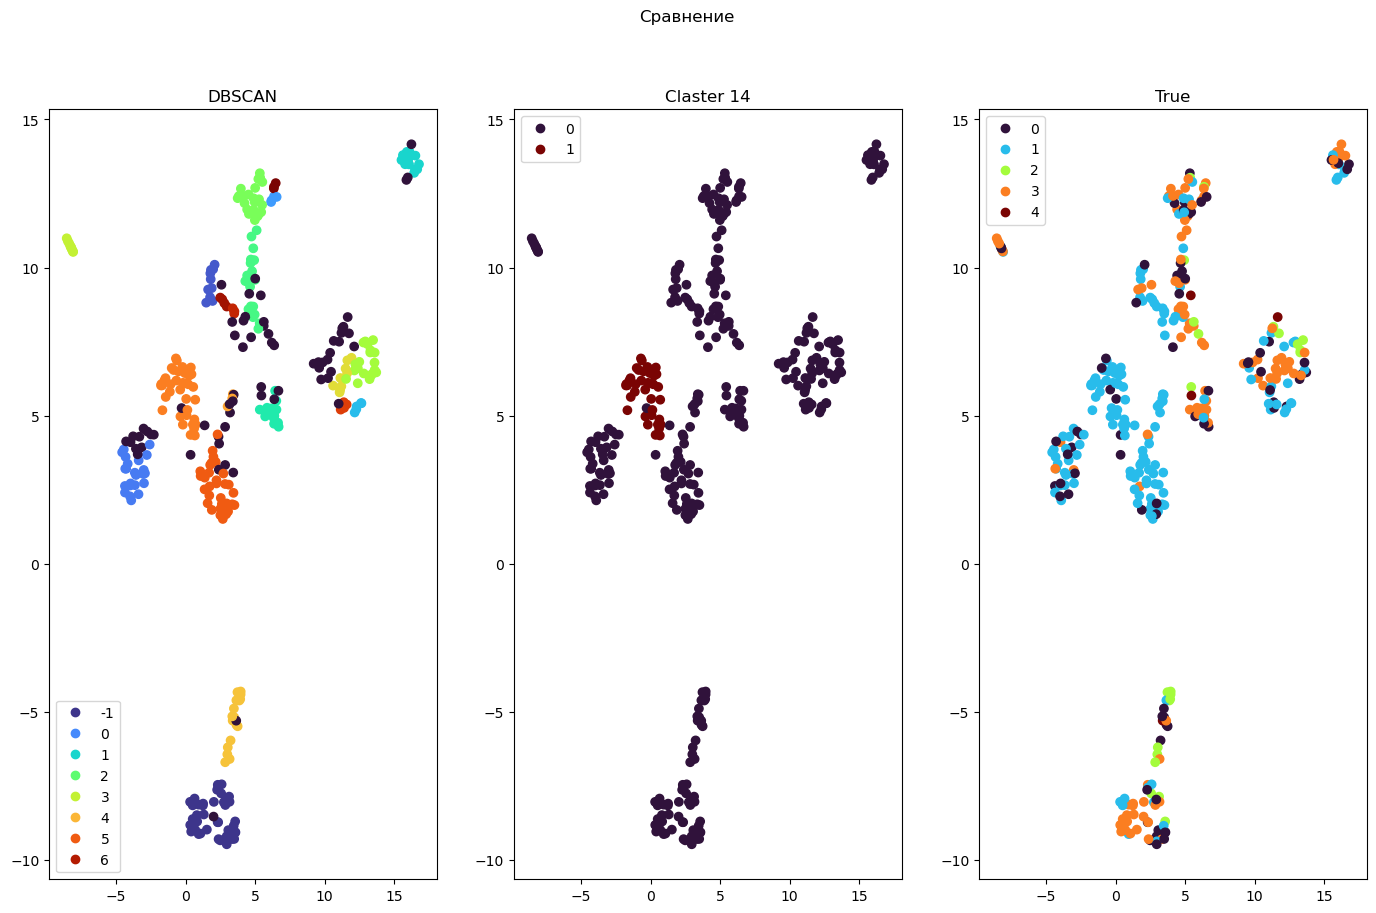

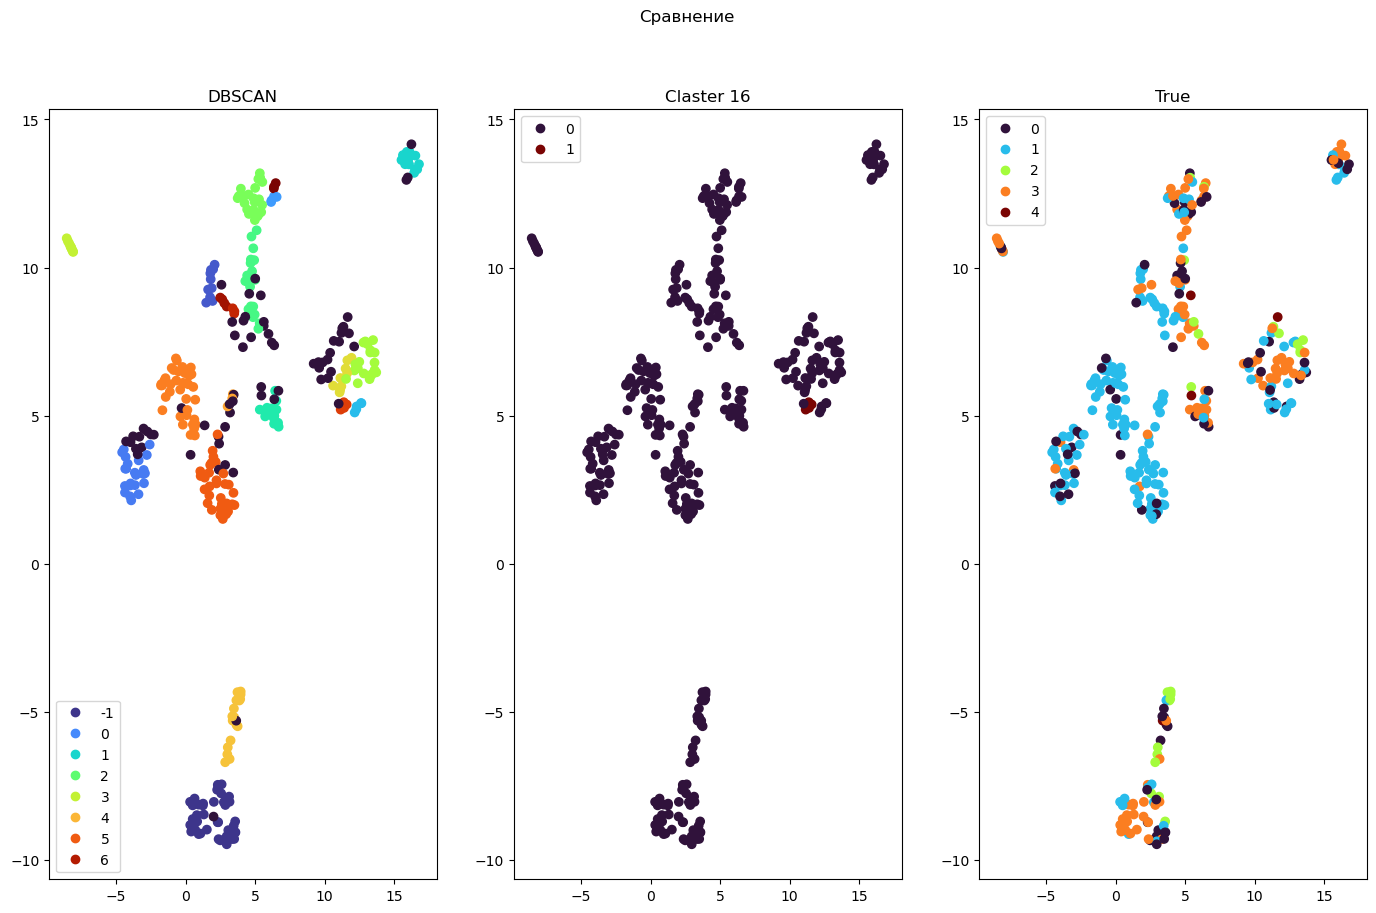

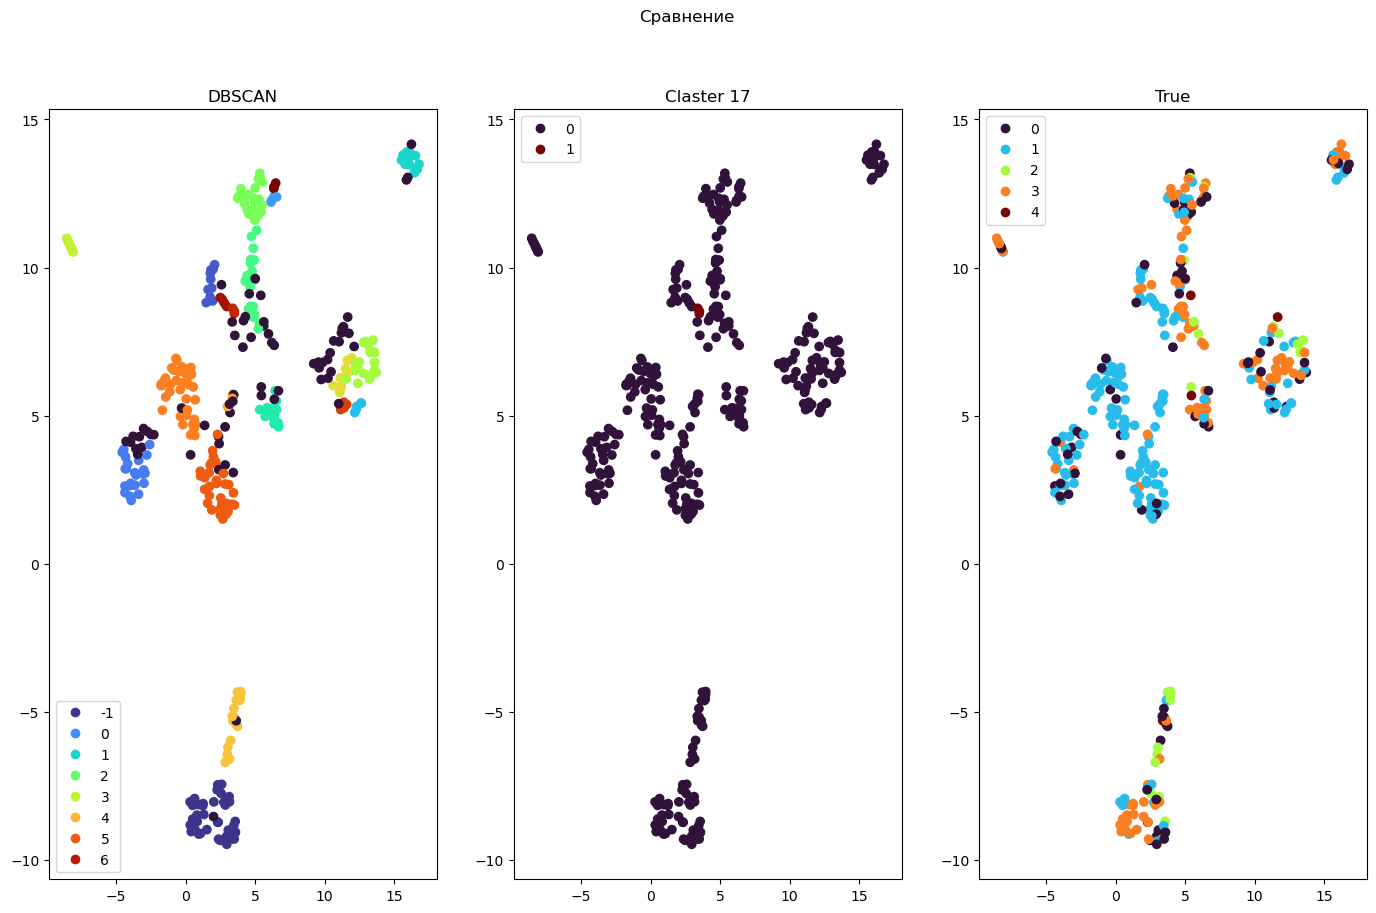

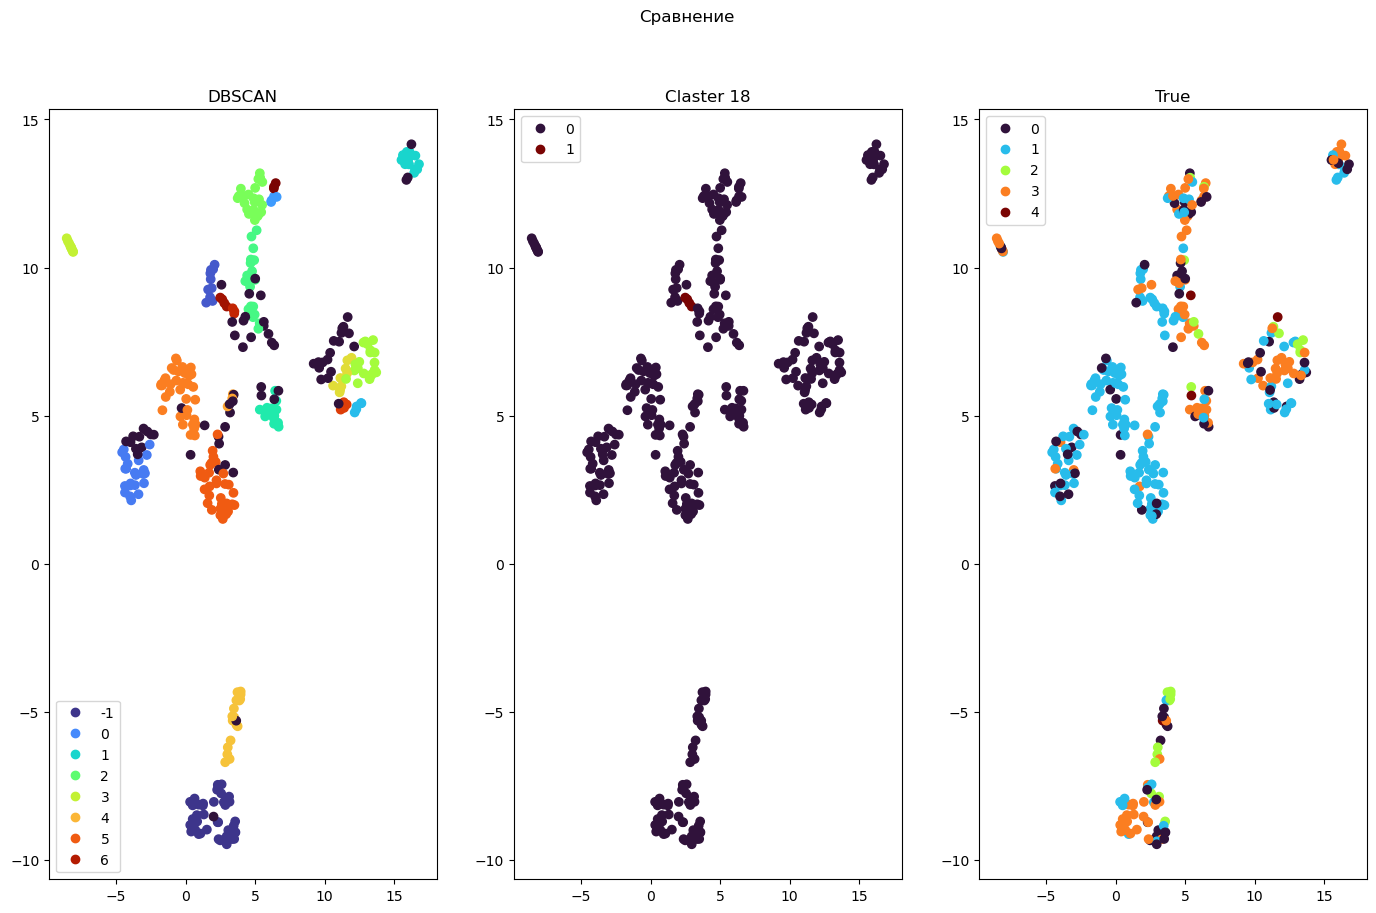

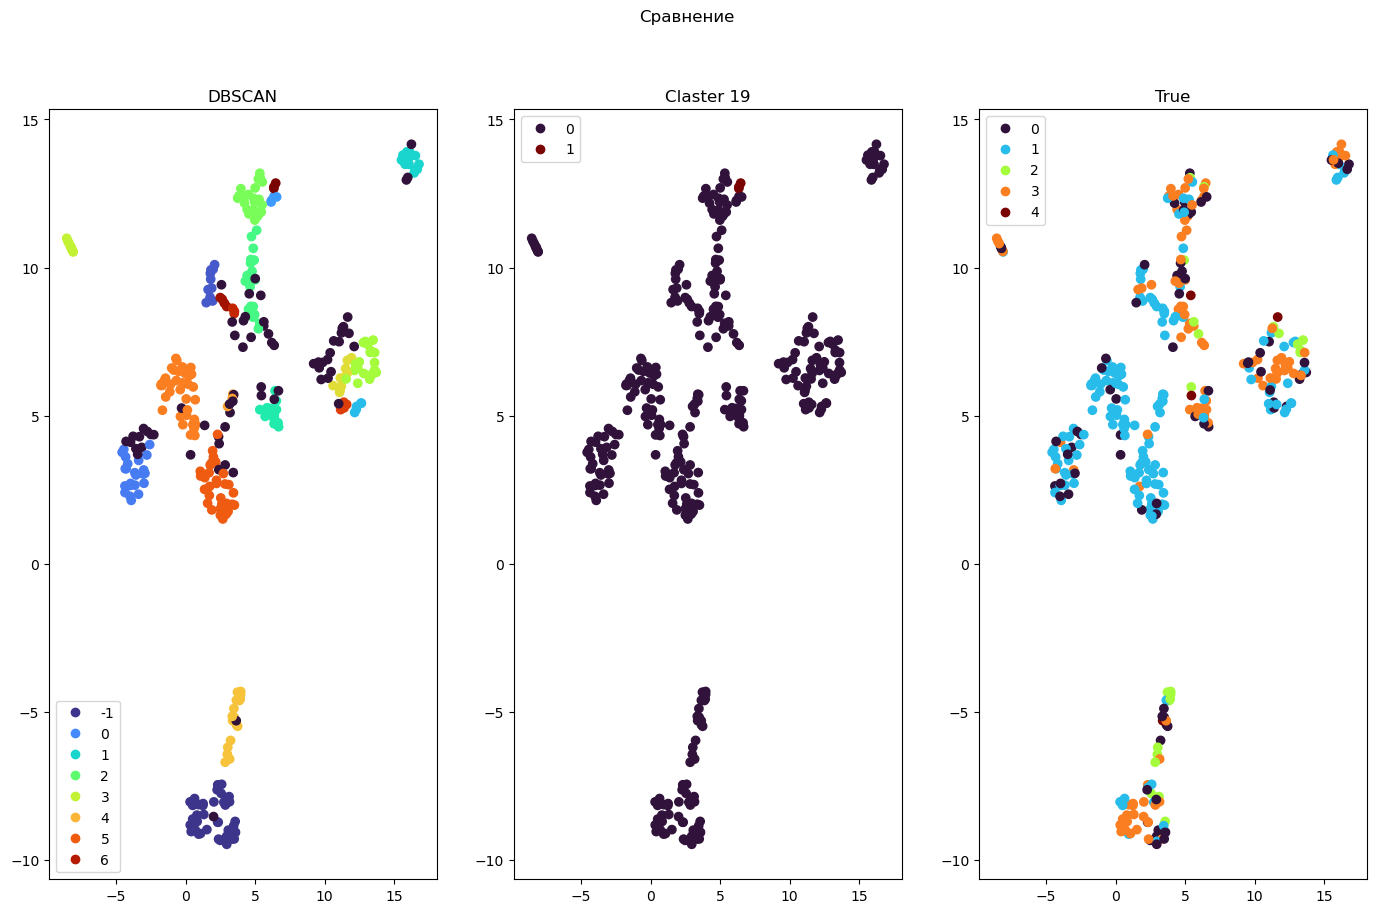

In [38]:
for index in list(all_dbscan_clasters['dbscan'].unique()):
    new_data = pd.Series([0 for _ in range(len(all_dbscan_clasters))],
                         index=all_dbscan_clasters.index)
    new_data[all_dbscan_clasters['dbscan'] == index] = 1
    compare_clusters('Сравнение', labels_1=dbscan_labels,
                     labels_2=new_data, labels_3=true_districts,
                 reduced_data_1=umap_data, reduced_data_2=umap_data, reduced_data_3=umap_data,
                 titles_for_data=['DBSCAN', f'Claster {index}', 'True'])

Теперь перекодируем полученные DBSCAN кластеры в предсказанные районы.

In [39]:
dbscan_dict = {0: 3,    1: 1,    2: 1,    3: 0,    4: 1,    5: 3,    6: 3,
                7: 3,    8: 3,    9: 3,    10: 3,    11: 3,    12: 2,    13: 1,
                14: 1,    15: 1,    16: 1,    17: 1,    18: 1,    19: 3}

In [40]:
predicted_distr_dbscan = all_dbscan_clasters.copy()

In [41]:
for value in dbscan_dict.keys():
    predicted_distr_dbscan[predicted_distr_dbscan['dbscan'] == value] = dbscan_dict[value]

Наконец, оценим наш прогноз как задачу классификации.

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
def report(test_y, preds):
    ConfusionMatrixDisplay.from_predictions(test_y, preds)
    plt.show()
    print(classification_report(test_y, preds, zero_division=0))

In [43]:
mask = predicted_distr_dbscan[predicted_distr_dbscan['dbscan'] == -1]

In [44]:
true_val = true_districts.drop(index=mask.index)
pred = predicted_distr_dbscan.drop(index=mask.index)['dbscan']

In [45]:
accuracy_score(list(true_val), list(pred))

0.5993265993265994

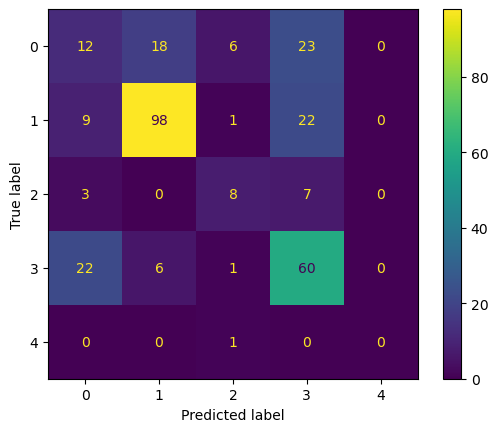

              precision    recall  f1-score   support

           0       0.26      0.20      0.23        59
           1       0.80      0.75      0.78       130
           2       0.47      0.44      0.46        18
           3       0.54      0.67      0.60        89
           4       0.00      0.00      0.00         1

    accuracy                           0.60       297
   macro avg       0.41      0.42      0.41       297
weighted avg       0.59      0.60      0.59       297



In [46]:
report(list(true_val), list(pred))

В связи с малым количеством данных классов 2 (Орджоникидзевский (левый берег)) и 4 (Ленинский (левый берег)), попробуем объединить их с классами 1 (Орджоникидзевский) и 3 (Ленинский).

In [47]:
reduced_classes_predict = predicted_distr_dbscan.copy()

In [48]:
reduced_classes_predict[reduced_classes_predict['dbscan'] == 2] = 1
reduced_classes_predict[reduced_classes_predict['dbscan'] == 4] = 3

In [49]:
reduced_classes_true = true_districts.copy()
reduced_classes_true[reduced_classes_true == 2] = 1
reduced_classes_true[reduced_classes_true == 4] = 3

In [50]:
reduced_true_val = reduced_classes_true.drop(index=mask.index)
reduced_pred = reduced_classes_predict.drop(index=mask.index)['dbscan']

In [51]:
accuracy_score(list(reduced_true_val), list(reduced_pred))

0.6026936026936027

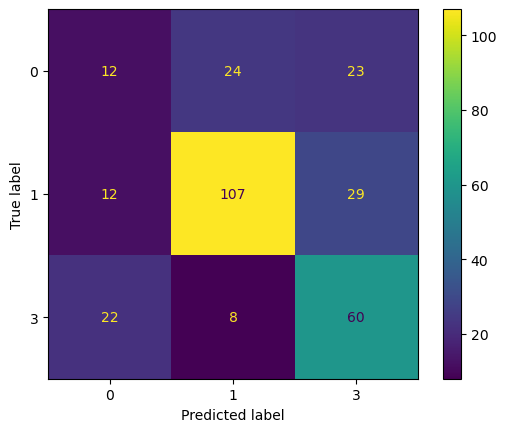

              precision    recall  f1-score   support

           0       0.26      0.20      0.23        59
           1       0.77      0.72      0.75       148
           3       0.54      0.67      0.59        90

    accuracy                           0.60       297
   macro avg       0.52      0.53      0.52       297
weighted avg       0.60      0.60      0.60       297



In [52]:
report(list(reduced_true_val), list(reduced_pred))

Точность возросла, но незначительно.

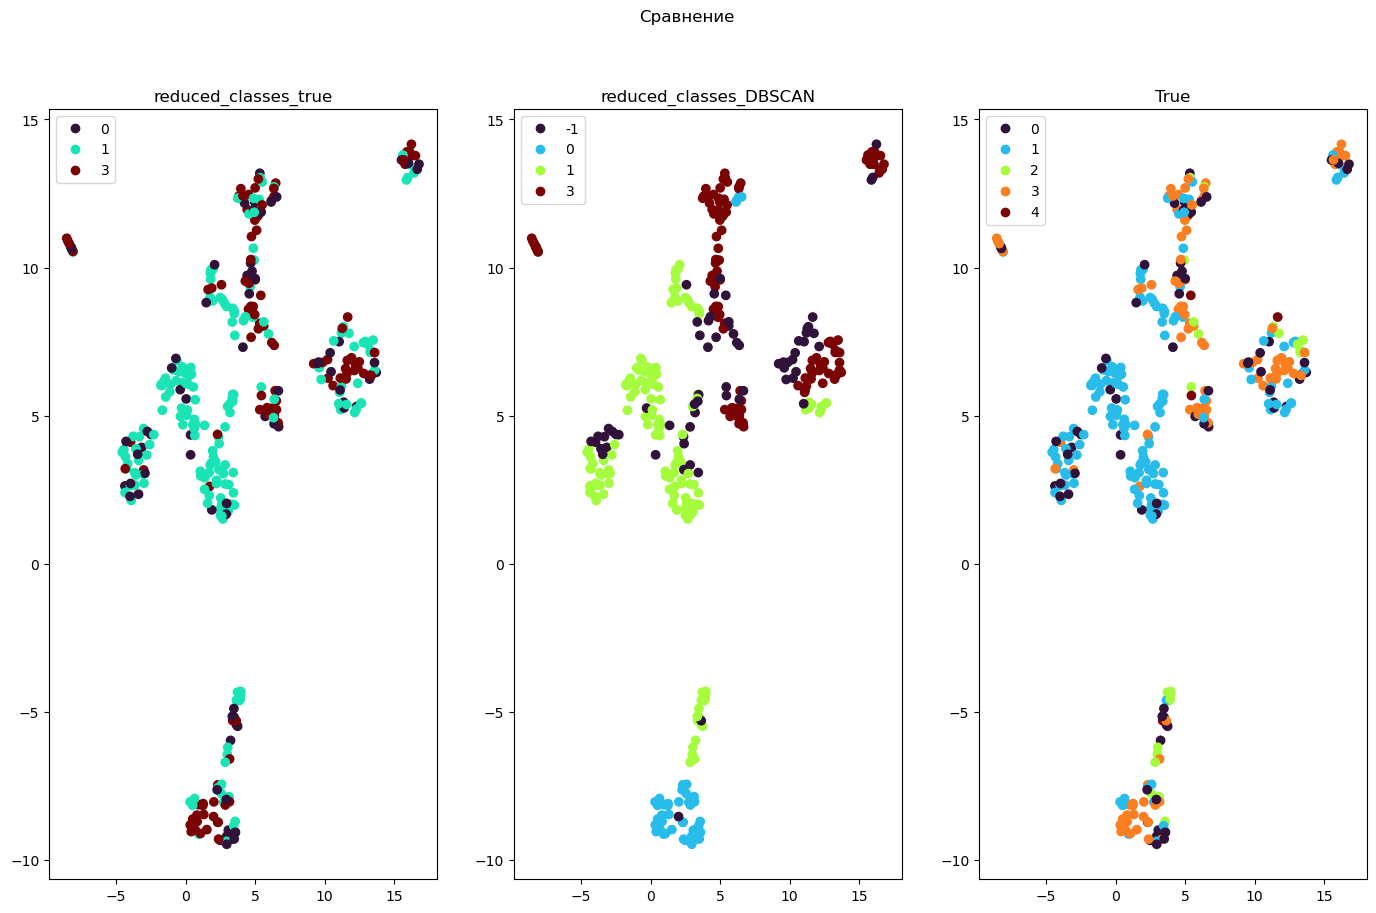

In [53]:
compare_clusters('Сравнение', labels_1=reduced_classes_true,
                 labels_2=reduced_classes_predict['dbscan'], labels_3=true_districts,
                 reduced_data_1=umap_data, reduced_data_2=umap_data, reduced_data_3=umap_data,
                 titles_for_data=['reduced_classes_true', 'reduced_classes_DBSCAN', 'True'])

# Анализ влияющего признака

При поиске наиболее информативного признака, наибольший интерес вызывает этажность дома. И действительно, наблюдается некоторая разница по типу застройки районов города.

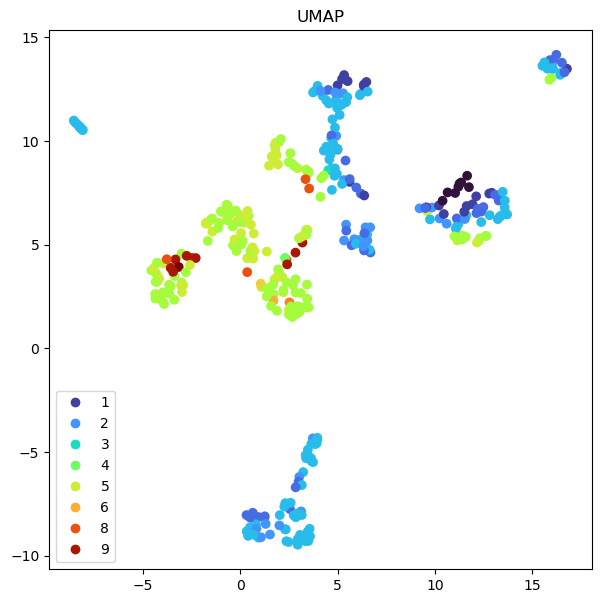

In [54]:
plot_clusters(umap_data, full_data['max_level'], 'UMAP')

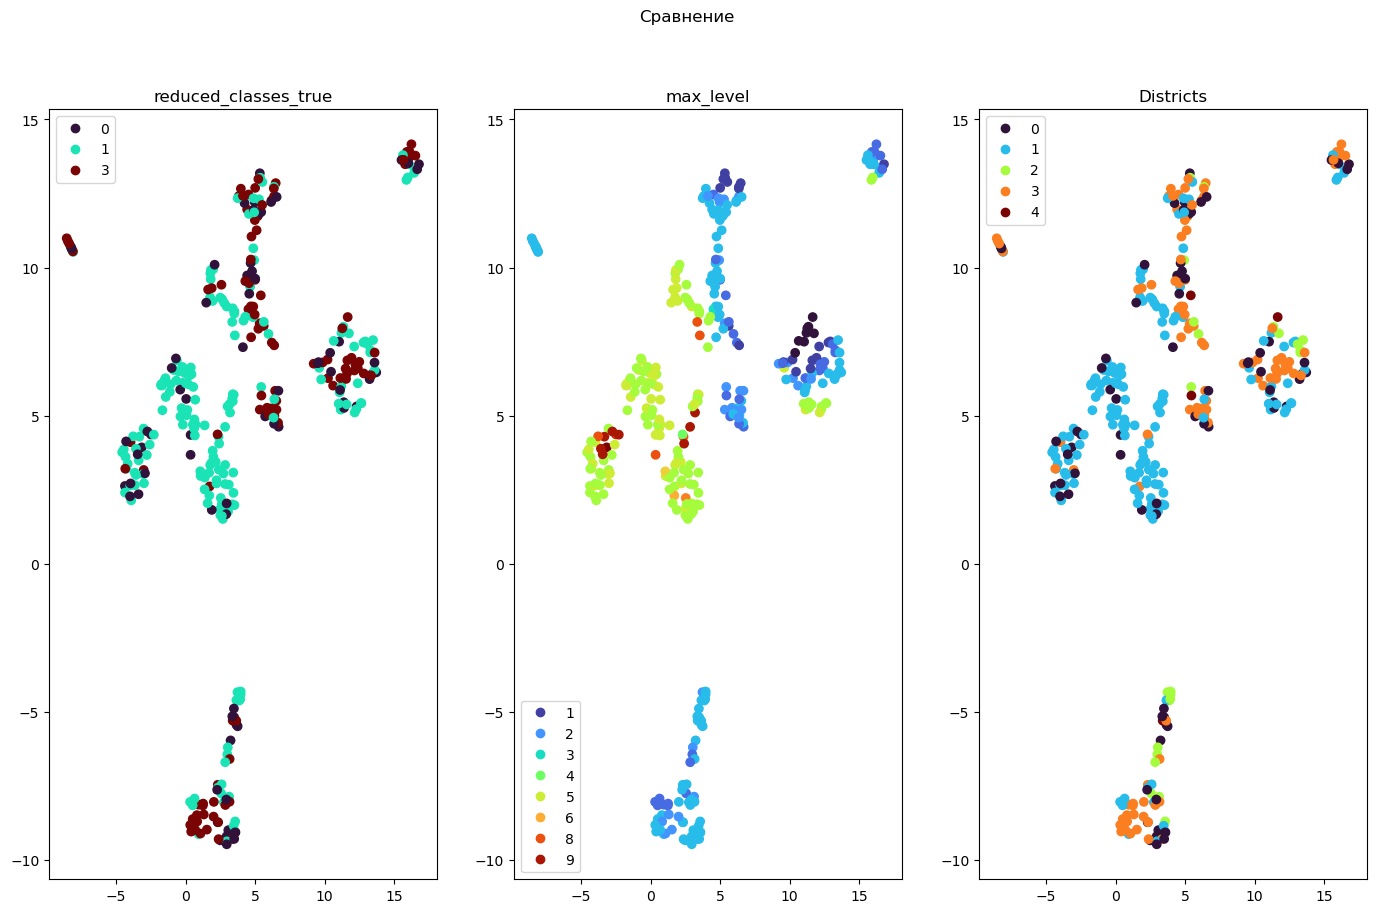

In [55]:
compare_clusters('Сравнение', labels_1=reduced_classes_true,
                 labels_2=full_data['max_level'], labels_3=true_districts,
                 reduced_data_1=umap_data, reduced_data_2=umap_data, reduced_data_3=umap_data,
                 titles_for_data=['reduced_classes_true', 'max_level', 'Districts'])

Надо отметить неплохое соответствие 4-х и 5-и этажных домов району 1 (Орджоникидзевский) и, наоборот, плохое выделение района 0 (Правобережный).